In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from src import graph_delta_DPOAE as dpoae

# Path inside the results folder
result_path = os.path.join("..", "results")

# Path inside the reports folder
report_path = os.path.join(result_path, "reports")

ls_sub = ["sub-01", "sub-02", "sub-03", "sub-04", "sub-05", "sub-06"]
columns = ["subject", "session_post", "ear", "x_list", "y_list"]
x_value_list = [0, 1001, 1501, 2002, 3003, 4004, 6006, 7996, 9998, 15000]
y_value_list_pp = [-3.78, -3.78, -2.9, -2.06, -2.09, -1.83, -1.58, -2.8, -2.8, -2.8]
y_value_list_48 = [-4.05, -4.05, -3.52, -2.69, -1.97, -2.55, -2.53, -4.43, -4.43, -4.43]

x_ticks = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
y_ticks = [-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]

side = ["Left", "Right"]

In [2]:
ls2do = []

for i in ls_sub:
    path = os.path.join(report_path, i)
    ls_doc = os.listdir(path)

    for a in ls_doc:
        if (a.find("report") != -1
                and a.find("DPOAE") != -1):
            ls2do.append(a)
        else:
            pass

ls2do.sort()

In [3]:
ls_df_anat_48_L_1 = []
ls_df_anat_48_R_1 = []
ls_df_func_48_L_1 = []
ls_df_func_48_R_1 = []
ls_df_anat_48_L_2 = []
ls_df_anat_48_R_2 = []
ls_df_func_48_L_2 = []
ls_df_func_48_R_2 = []
ls_df_anat_pp_L = []
ls_df_anat_pp_R = []
ls_df_func_pp_L = []
ls_df_func_pp_R = []

for j in range(0, len(ls2do)):
    #print(ls2do[j])
    decomp = ls2do[j].split("_")
    sub = decomp[0]
    ses_pre = decomp[2]
    ses_post = decomp[3].split(".")[0]
    
    df_ref = pd.read_csv(os.path.join(result_path, "BIDS_data", sub, f"{sub}_sessions.tsv"), sep="\t")
    df_report = pd.read_csv(os.path.join(report_path, sub, ls2do[j]), sep="\t")
    #print(df_report)

    scan_type = df_ref.loc[df_ref["session_id"] == ses_post, "scan_type"].iloc[0]
    #print(scan_type)
    ses_type = df_ref.loc[df_ref["session_id"] == ses_post, "condition"].iloc[0]
    #print(ses_type)
    
    for b in range(0, len(df_report)):
        ls_L = []
        ls_R = []

        ls_L.append(sub)
        ls_R.append(sub)
        ls_L.append(ses_post)
        ls_R.append(ses_post)
        ls_L.append("L")
        ls_R.append("R")    
        
        try:
            float(df_report.at[b, "freq2"])
        except ValueError:
            pass
        else:        
            try:
                int(float(df_report.at[b, "diff_L"]))
            except:
                pass
            else:
                ls_L.append(int(df_report.at[b, "freq2"]))
                ls_L.append(int(float(df_report.at[b, "diff_L"])))
                if scan_type == "Anatomical":
                    if ses_type.find("right after the scan") != -1:
                        ls_df_anat_pp_L.append(ls_L)
                    elif ses_type.startswith("Condition 2"):
                        if ses_pre == "ses-01":
                            ls_df_anat_48_L_1.append(ls_L)
                        elif ses_pre == "ses-02":
                            ls_df_anat_48_L_2.append(ls_L)
                elif scan_type == "Functional":
                    if ses_type.find("right after the scan") != -1:
                        ls_df_func_pp_L.append(ls_L)
                    elif ses_type.startswith("Condition 2"):
                        if ses_pre == "ses-01":
                            ls_df_func_48_L_1.append(ls_L)
                        elif ses_pre == "ses-02":
                            ls_df_func_48_L_2.append(ls_L)

            try:
                int(float(df_report.at[b, "diff_R"]))
            except:
                pass
            else:
                ls_R.append(int(df_report.at[b, "freq2"]))
                ls_R.append(int(float(df_report.at[b, "diff_R"])))
                if scan_type == "Anatomical":
                    if ses_type.find("right after the scan") != -1:
                        ls_df_anat_pp_R.append(ls_R)
                    elif ses_type.startswith("Condition 2"):
                        if ses_pre == "ses-01":
                            ls_df_anat_48_R_1.append(ls_R)
                        elif ses_pre == "ses-02":
                            ls_df_anat_48_R_2.append(ls_R)
                elif scan_type == "Functional":
                    if ses_type.find("right after the scan") != -1:
                        ls_df_func_pp_R.append(ls_R)
                    elif ses_type.startswith("Condition 2"):
                        if ses_pre == "ses-01":
                            ls_df_func_48_R_1.append(ls_R)
                        elif ses_pre == "ses-02":
                            ls_df_func_48_R_2.append(ls_R)

#print(ls_df_func_pp_L)

In [4]:
df_anat_48_L_1 = pd.DataFrame(ls_df_anat_48_L_1, columns=columns)
df_anat_48_R_1 = pd.DataFrame(ls_df_anat_48_R_1, columns=columns)
df_anat_48_L_2 = pd.DataFrame(ls_df_anat_48_L_2, columns=columns)
df_anat_48_R_2 = pd.DataFrame(ls_df_anat_48_R_2, columns=columns)
df_anat_pp_L = pd.DataFrame(ls_df_anat_pp_L, columns=columns)
df_anat_pp_R = pd.DataFrame(ls_df_anat_pp_R, columns=columns)
df_func_48_L_1 = pd.DataFrame(ls_df_func_48_L_1, columns=columns)
df_func_48_R_1 = pd.DataFrame(ls_df_func_48_R_1, columns=columns)
df_func_48_L_2 = pd.DataFrame(ls_df_func_48_L_2, columns=columns)
df_func_48_R_2 = pd.DataFrame(ls_df_func_48_R_2, columns=columns)
df_func_pp_L = pd.DataFrame(ls_df_func_pp_L, columns=columns)
df_func_pp_R = pd.DataFrame(ls_df_func_pp_R, columns=columns)

Text(0.5, 1, '[48h, 7 days] postscan - Baseline #1 (anatomical)')

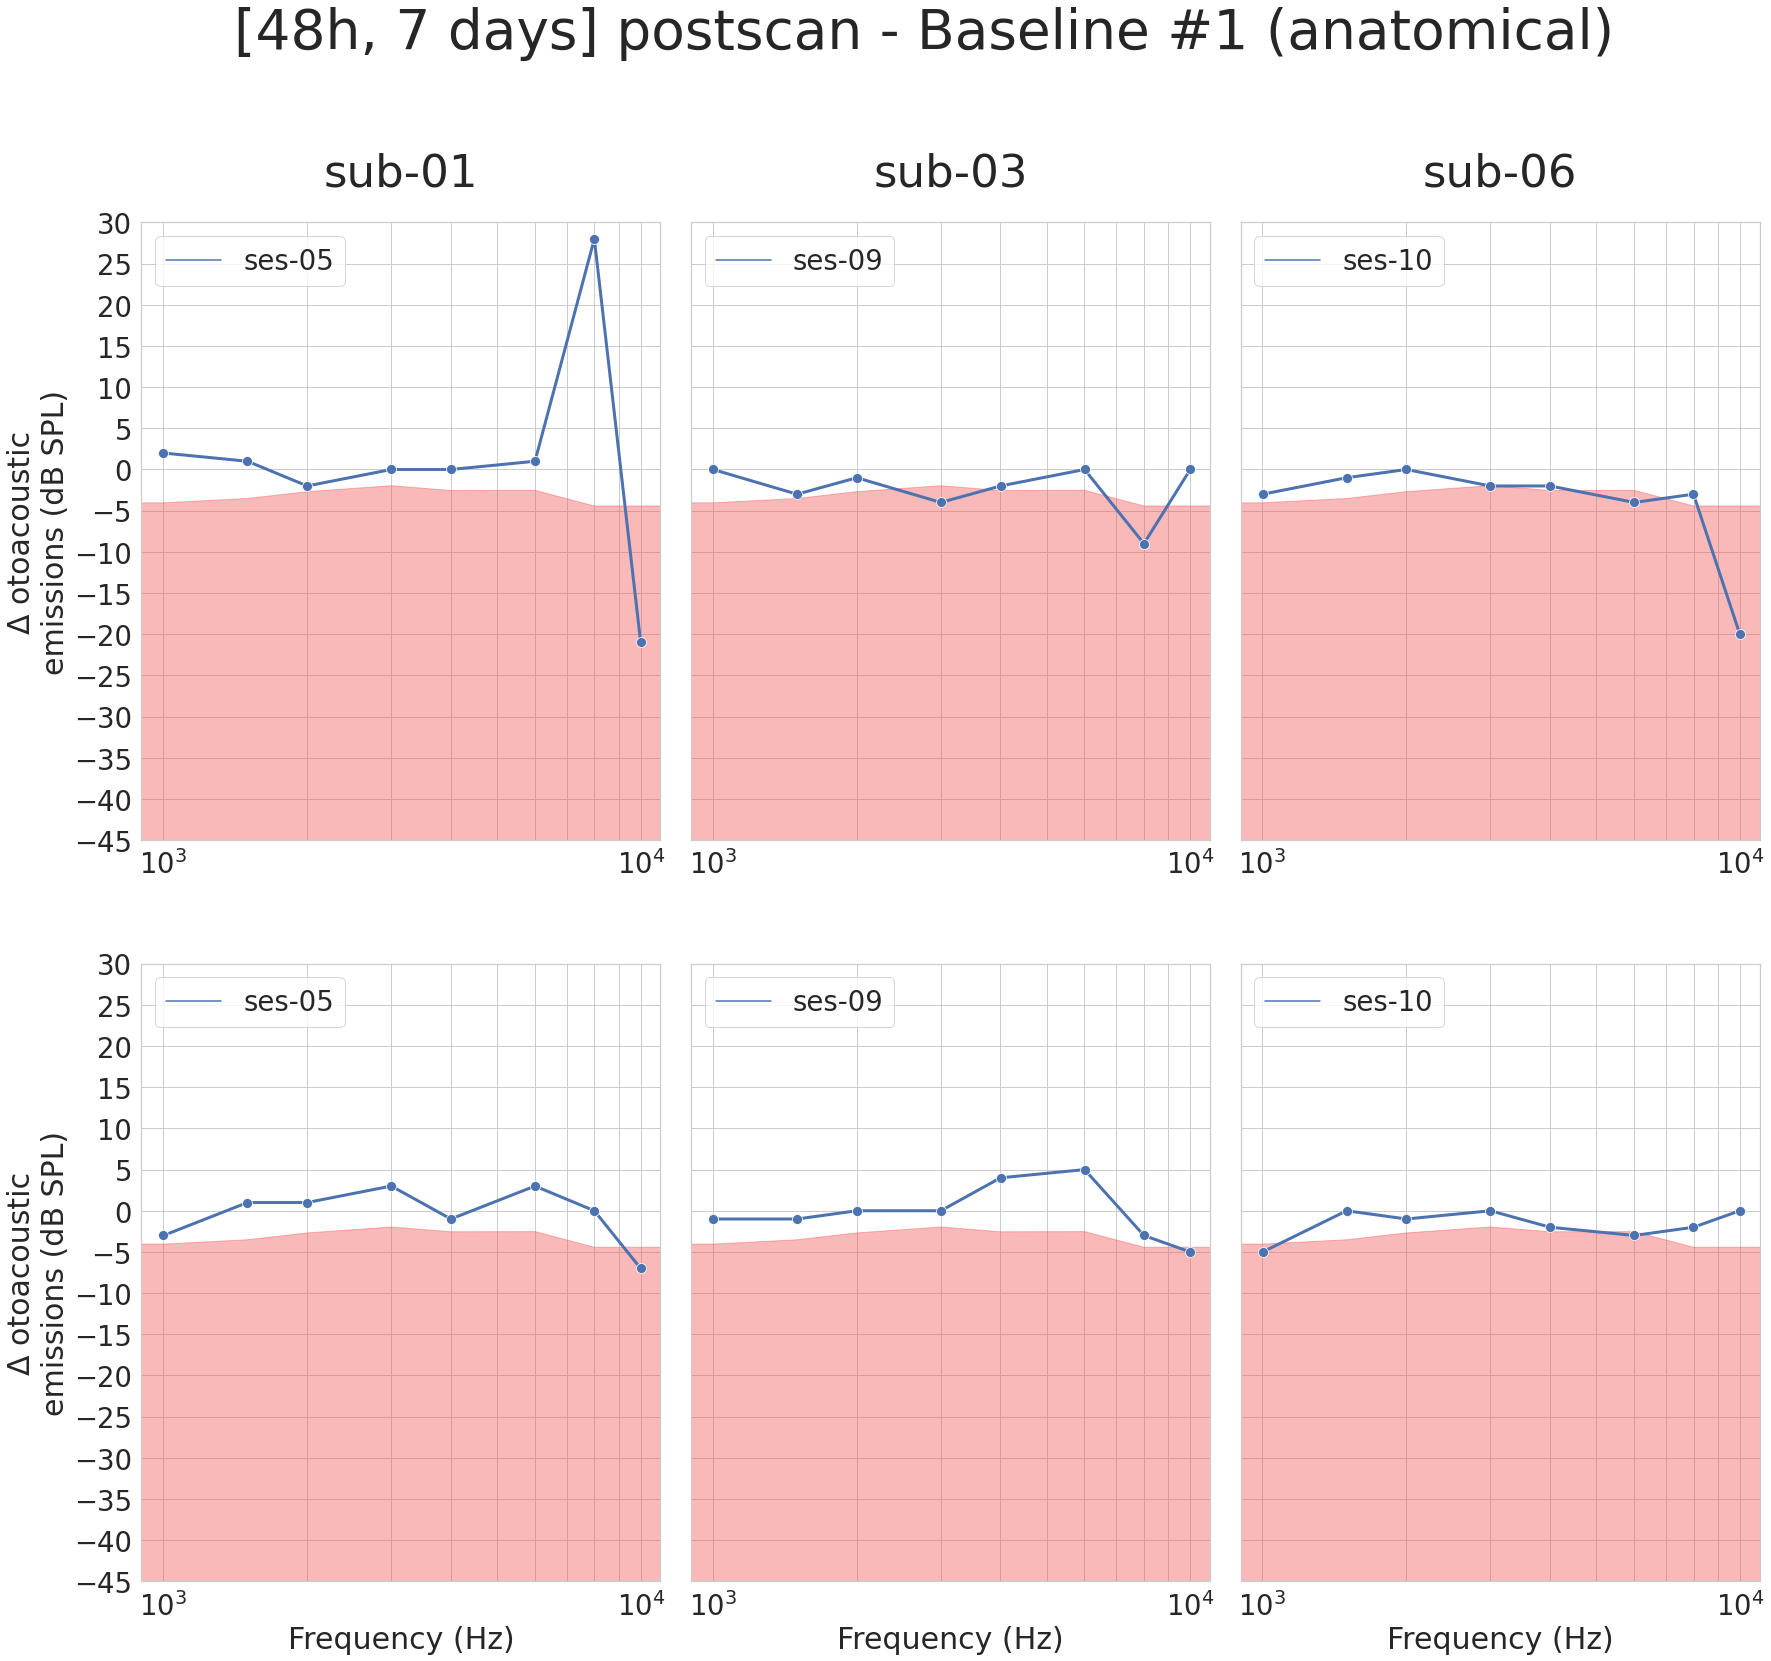

In [15]:
# Anatomical, [48h - 7 days] post scan - Baseline #1

#plt.rcParams["figure.figsize"] = (50, 25) # v. 0.2.2
plt.rcParams["figure.figsize"] = (29, 25) # v. 0.2.4
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 2
n_columns = 62

row_L = 0
row_R = 1

column_01 = 0
column_03 = 21
column_06 = 42

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_anat_48 = sns.lineplot(data=df_anat_48_L_1.loc[df_anat_48_L_1["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_anat_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_anat_48.tick_params(labelbottom=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-01, Right
fig_anat_48 = sns.lineplot(data=df_anat_48_R_1.loc[df_anat_48_R_1["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_anat_48.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Left
fig_anat_48 = sns.lineplot(data=df_anat_48_L_1.loc[df_anat_48_L_1["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_anat_48.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Right
fig_anat_48 = sns.lineplot(data=df_anat_48_R_1.loc[df_anat_48_R_1["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_anat_48.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_48.tick_params(labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Left
fig_anat_48 = sns.lineplot(data=df_anat_48_L_1.loc[df_anat_48_L_1["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_anat_48.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Right
fig_anat_48 = sns.lineplot(data=df_anat_48_R_1.loc[df_anat_48_R_1["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_anat_48.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_48.tick_params(labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

fig.suptitle("[48h, 7 days] postscan - Baseline #1 (anatomical)", fontsize=55, y=1)

Text(0.5, 1, '[48h, 7 days] postscan - Baseline #2 (anatomical)')

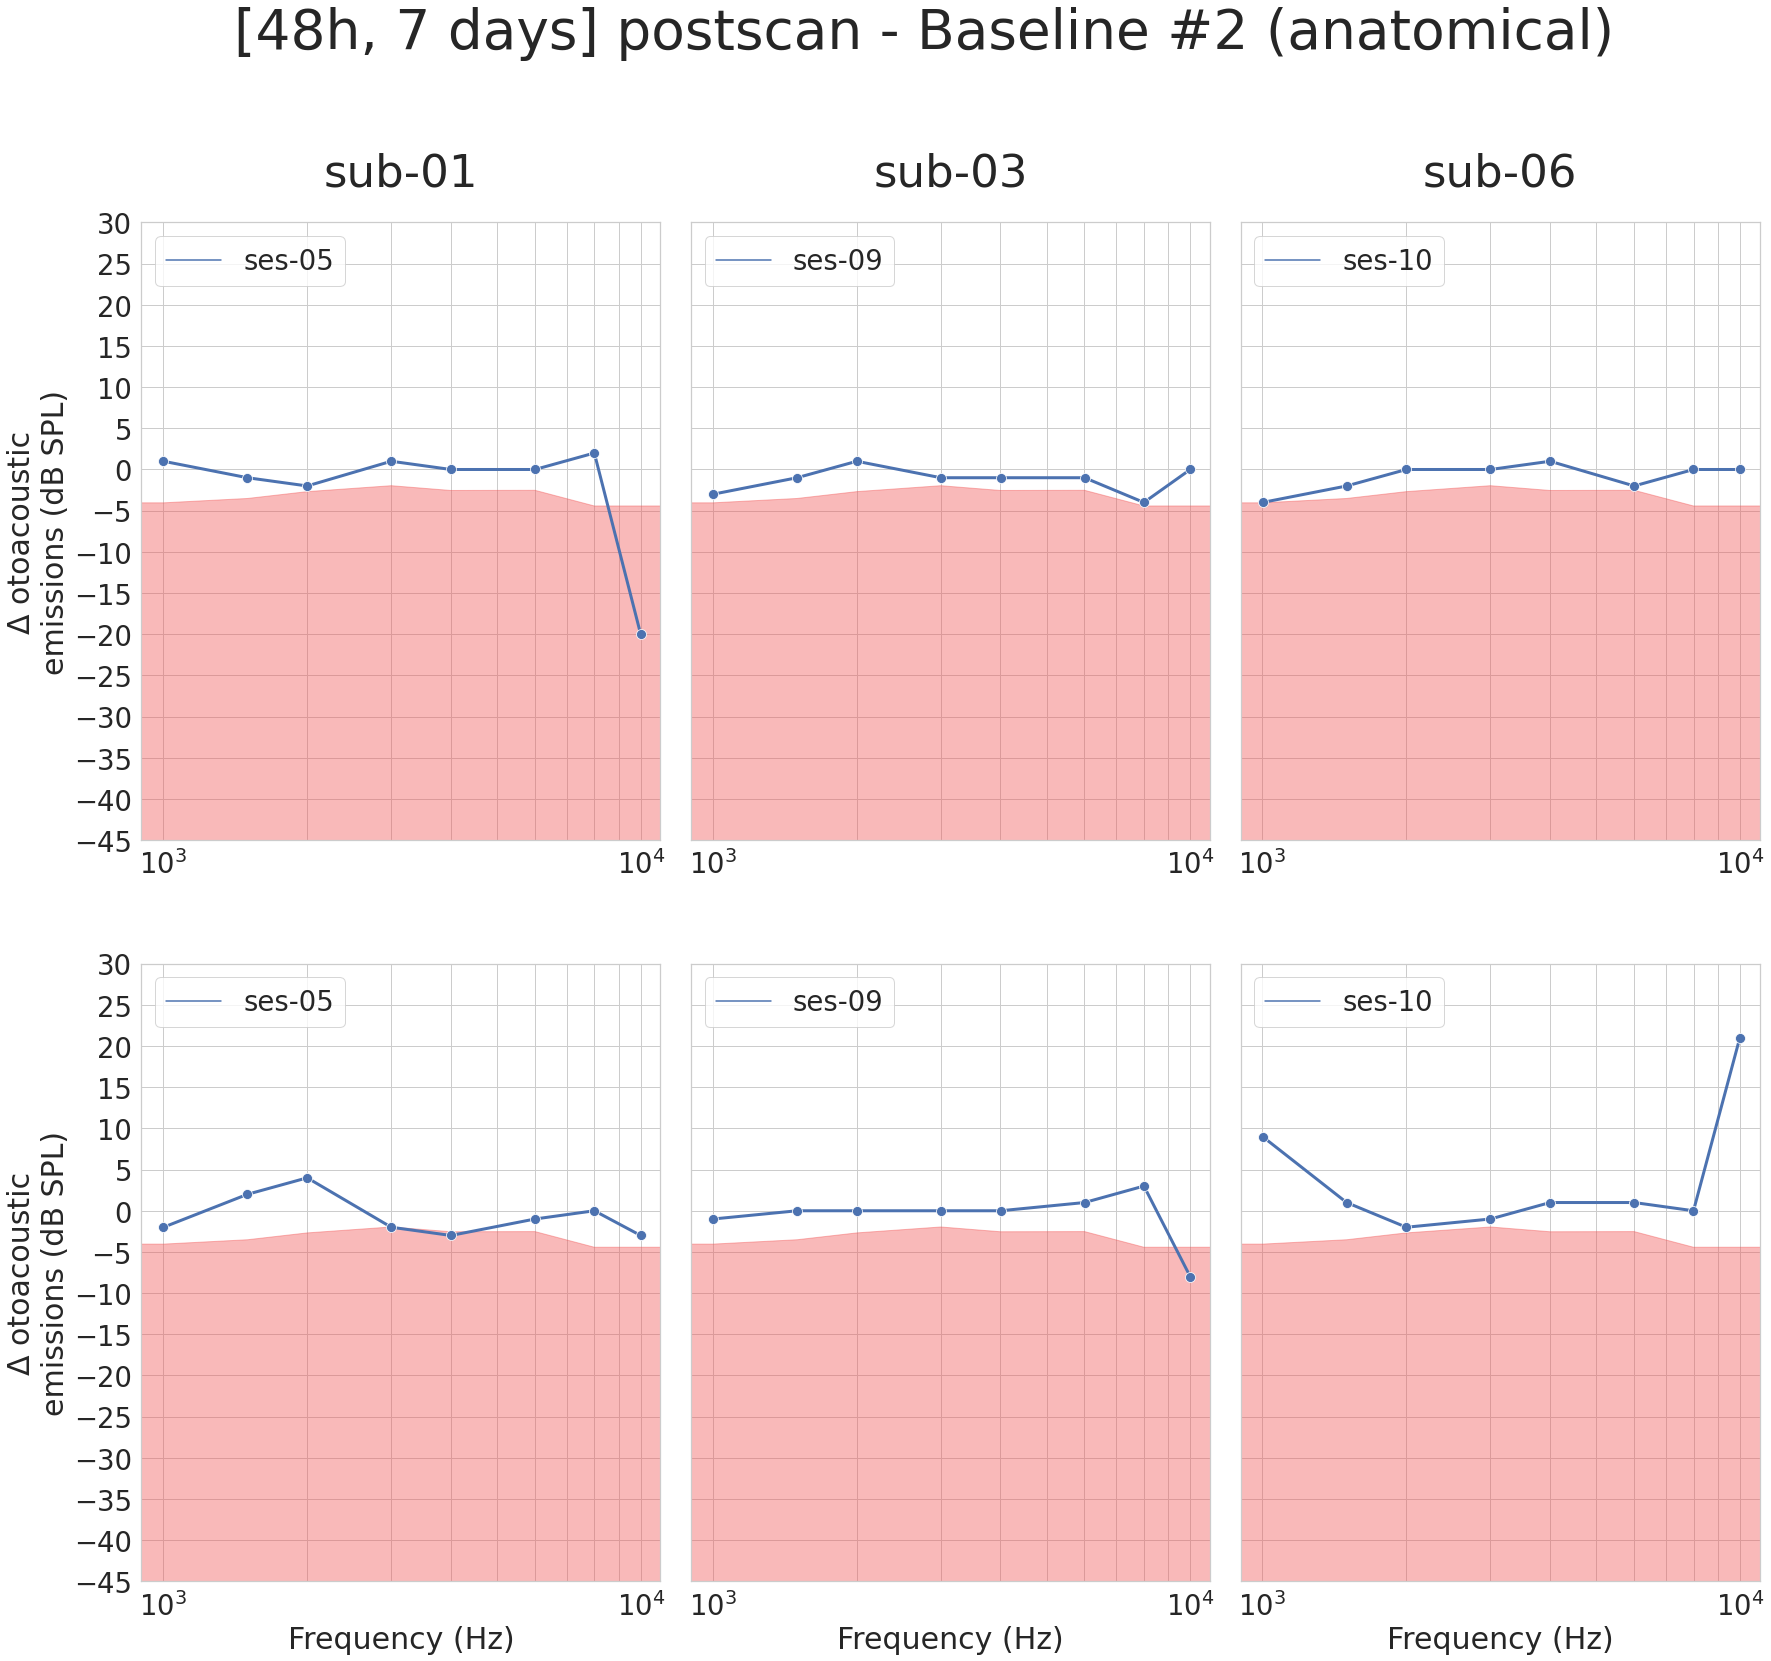

In [17]:
# Anatomical, [48h - 7 days] post scan - Baseline #2

#plt.rcParams["figure.figsize"] = (50, 25) # v. 0.2.2
plt.rcParams["figure.figsize"] = (29, 25) # v. 0.2.4
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 2
n_columns = 62

row_L = 0
row_R = 1

column_01 = 0
column_03 = 21
column_06 = 42

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_anat_48 = sns.lineplot(data=df_anat_48_L_2.loc[df_anat_48_L_2["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_anat_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_anat_48.tick_params(labelbottom=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-01, Right
fig_anat_48 = sns.lineplot(data=df_anat_48_R_2.loc[df_anat_48_R_2["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_anat_48.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Left
fig_anat_48 = sns.lineplot(data=df_anat_48_L_2.loc[df_anat_48_L_2["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_anat_48.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Right
fig_anat_48 = sns.lineplot(data=df_anat_48_R_2.loc[df_anat_48_R_2["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_anat_48.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_48.tick_params(labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Left
fig_anat_48 = sns.lineplot(data=df_anat_48_L_2.loc[df_anat_48_L_2["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_anat_48.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Right
fig_anat_48 = sns.lineplot(data=df_anat_48_R_2.loc[df_anat_48_R_2["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_anat_48.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_48.tick_params(labelleft=False)
fig_anat_48.legend_.set_title(None)
fig_anat_48.legend(loc="upper left")

fig_anat_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

fig.suptitle("[48h, 7 days] postscan - Baseline #2 (anatomical)", fontsize=55, y=1)

Text(0.5, 1, 'Postscan - Prescan (anatomical)')

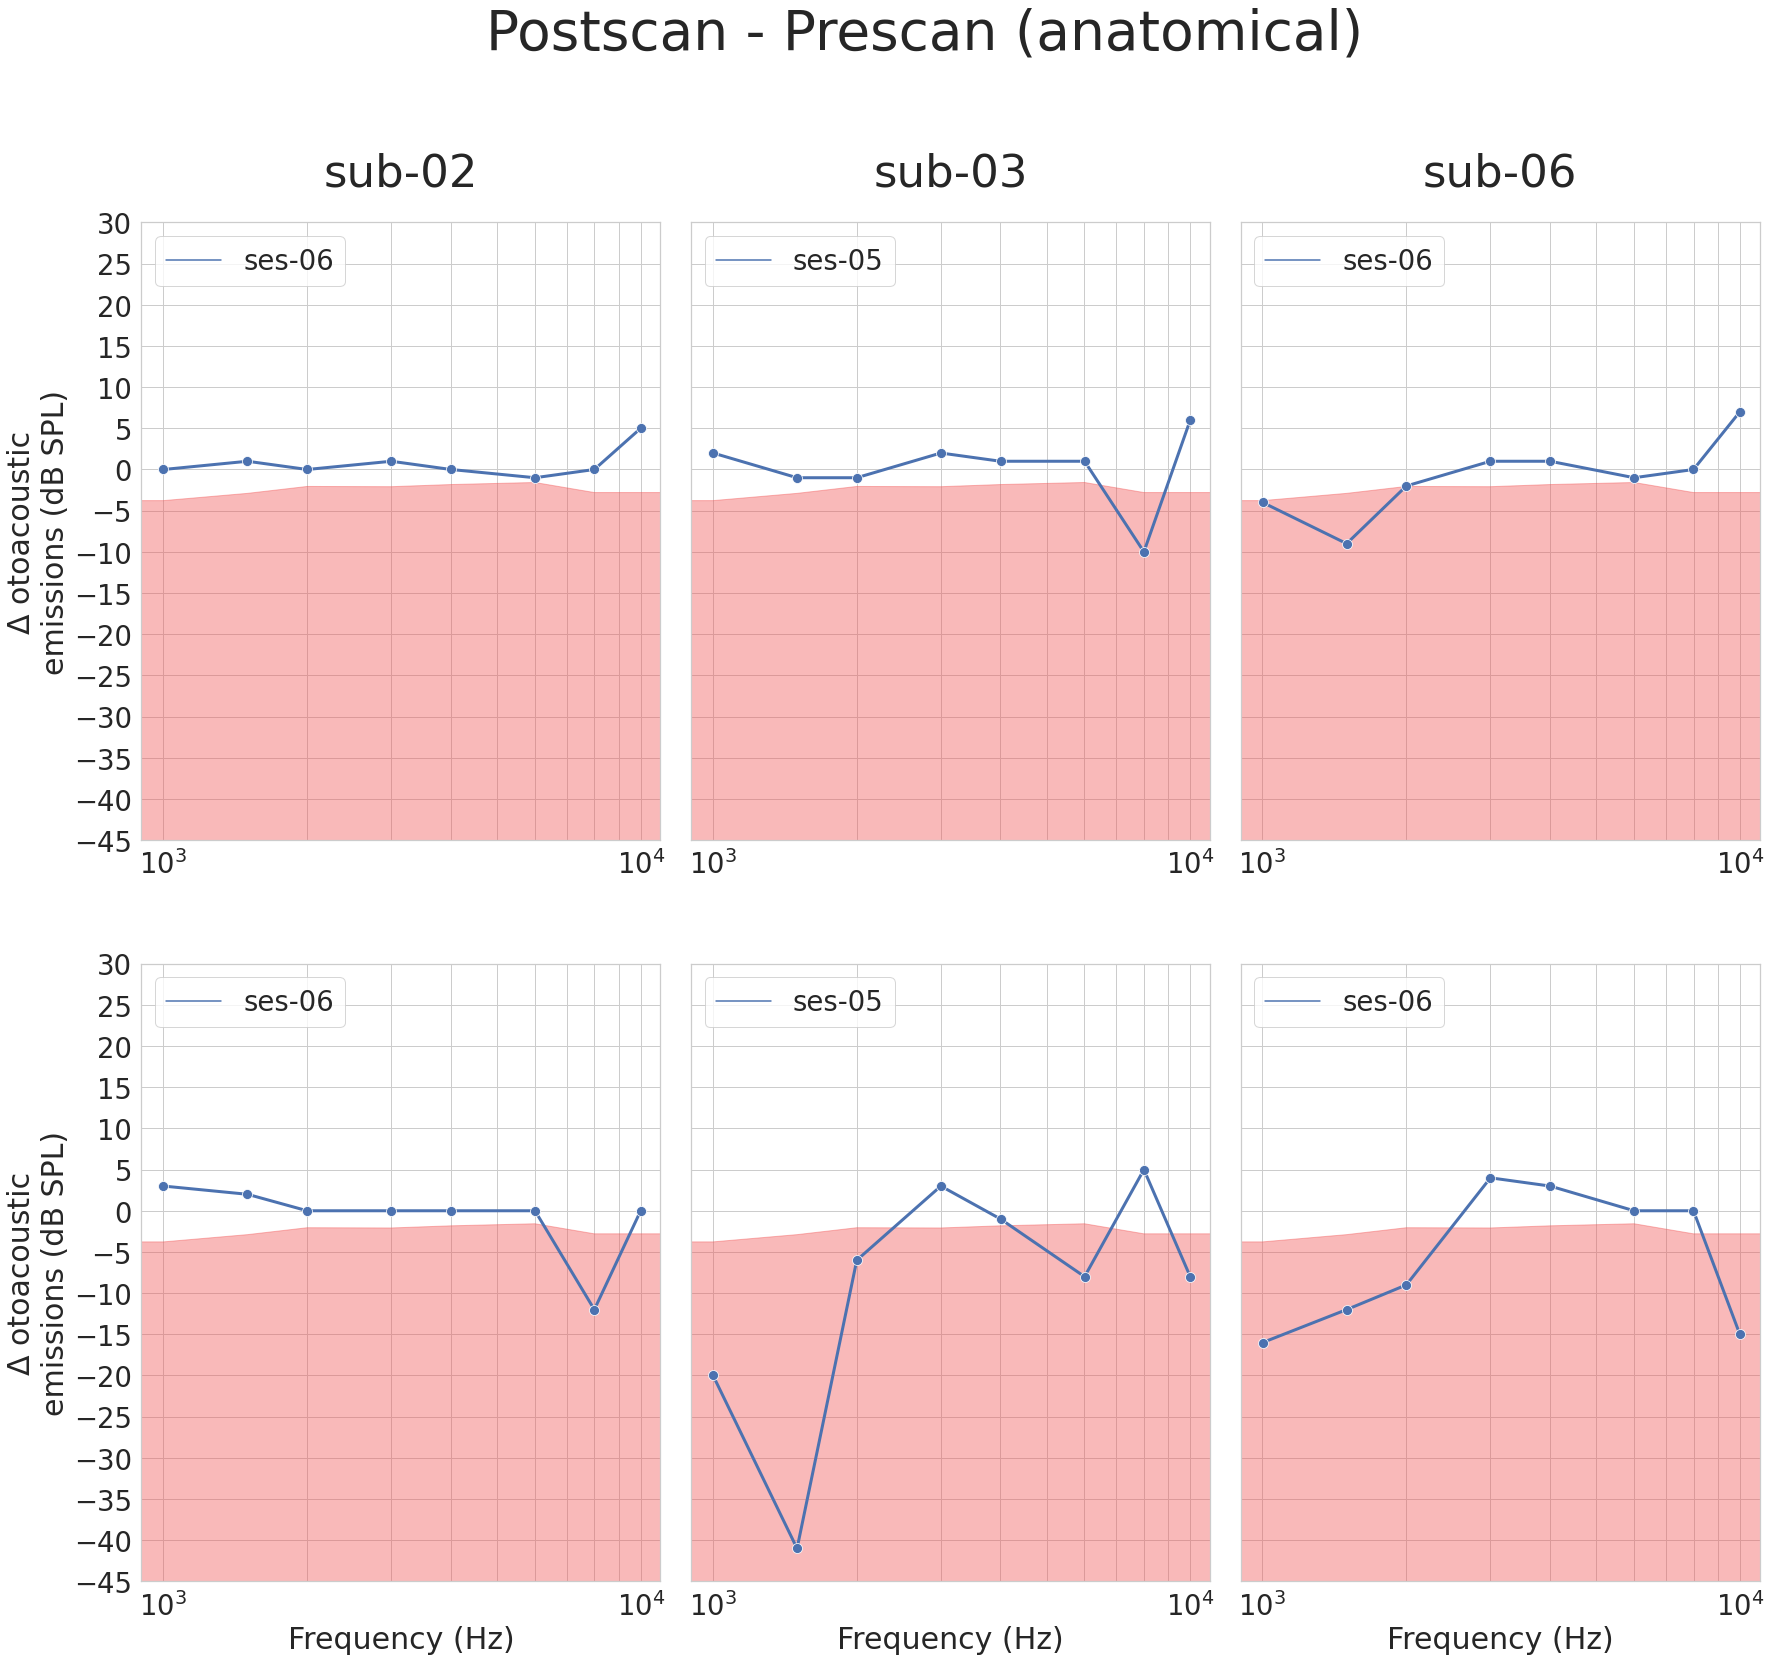

In [19]:
# Anatomical, Post scan - Pre scan

#plt.rcParams["figure.figsize"] = (50, 20) # v. 0.2.2
plt.rcParams["figure.figsize"] = (29, 25) # v. 0.2.4
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 2
n_columns = 62

row_L = 0
row_R = 1

column_02 = 0
column_03 = 21
column_06 = 42

rowspan = 1
colspan = 20

ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-02, Left
fig_anat_pp = sns.lineplot(data=df_anat_pp_L.loc[df_anat_pp_L["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L
                          )

fig_anat_pp.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_pp.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_anat_pp.tick_params(labelbottom=False)
fig_anat_pp.legend_.set_title(None)
fig_anat_pp.legend(loc="upper left")

fig_anat_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-02, Right
fig_anat_pp = sns.lineplot(data=df_anat_pp_R.loc[df_anat_pp_R["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_anat_pp.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_anat_pp.legend_.set_title(None)
fig_anat_pp.legend(loc="upper left")

fig_anat_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-03, Left
fig_anat_pp = sns.lineplot(data=df_anat_pp_L.loc[df_anat_pp_L["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_anat_pp.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_pp.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_anat_pp.legend_.set_title(None)
fig_anat_pp.legend(loc="upper left")

fig_anat_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-03, Right
fig_anat_pp = sns.lineplot(data=df_anat_pp_R.loc[df_anat_pp_R["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_anat_pp.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_pp.tick_params(labelleft=False)
fig_anat_pp.legend_.set_title(None)
fig_anat_pp.legend(loc="upper left")

fig_anat_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-06, Left
fig_anat_pp = sns.lineplot(data=df_anat_pp_L.loc[df_anat_pp_L["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_anat_pp.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_pp.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_anat_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_anat_pp.legend_.set_title(None)
fig_anat_pp.legend(loc="upper left")

fig_anat_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-06, Right
fig_anat_pp = sns.lineplot(data=df_anat_pp_R.loc[df_anat_pp_R["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_anat_pp.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_anat_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_anat_pp.tick_params(labelleft=False)
fig_anat_pp.legend_.set_title(None)
fig_anat_pp.legend(loc="upper left")

fig_anat_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

fig.suptitle("Postscan - Prescan (anatomical)", fontsize=55, y=1)

Text(0.5, 0.95, '[48h, 7 days] postscan - Baseline #1 (functional)')

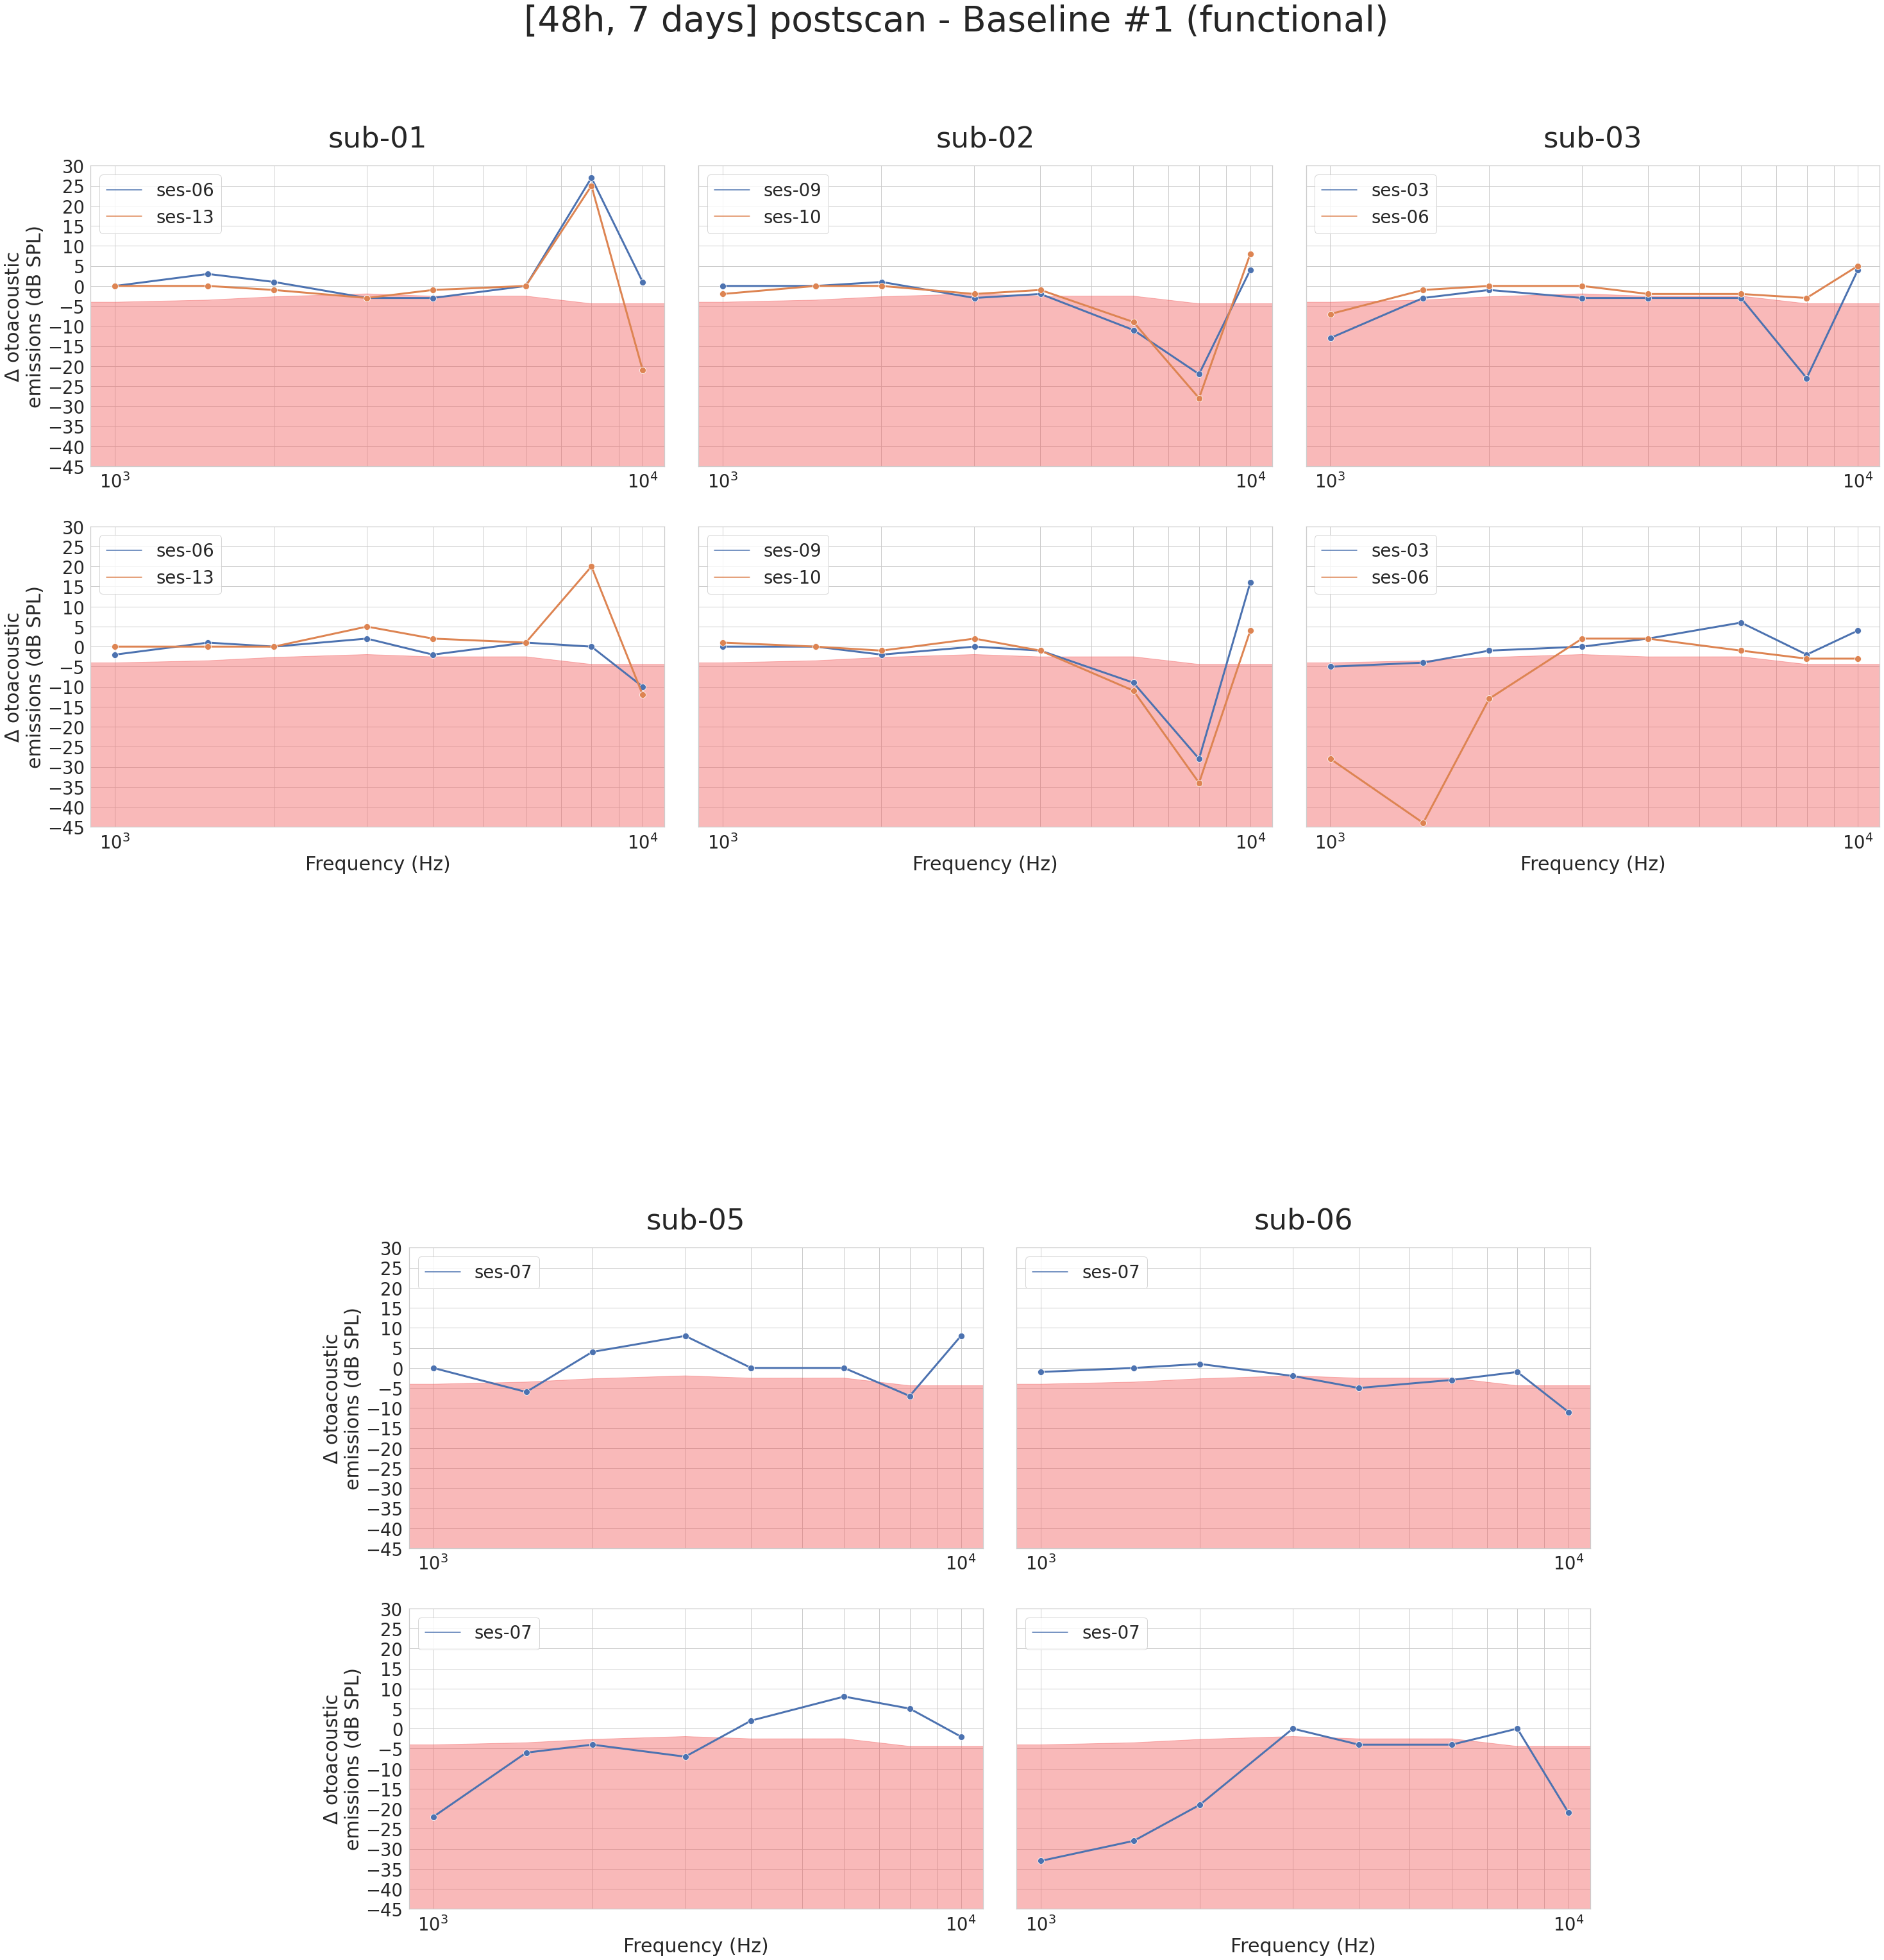

In [8]:
# Functional, [48h - 7 days] post scan - Baseline #1

plt.rcParams["figure.figsize"] = (50, 50) # v. 0.2.2
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 5
n_columns = 62

row_0_L = 0
row_0_R = 1
row_1_L = 3
row_1_R = 4

column_01 = 0
column_02 = 21
column_03 = 42
column_05 = 11
column_06 = 32

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_L, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_R, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_48.tick_params(labelbottom=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-01, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_func_48.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L)

fig_func_48.set(title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_func_48.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_func_48.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_func_48.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-05",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_48.tick_params(labelbottom=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_R)

fig_func_48.set(#title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_func_48.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_func_48.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

fig.suptitle("[48h, 7 days] postscan - Baseline #1 (functional)", fontsize=55, y=0.95)

#plt.tight_layout()

Text(0.5, 0.95, '[48h, 7 days] postscan - Baseline #2 (functional)')

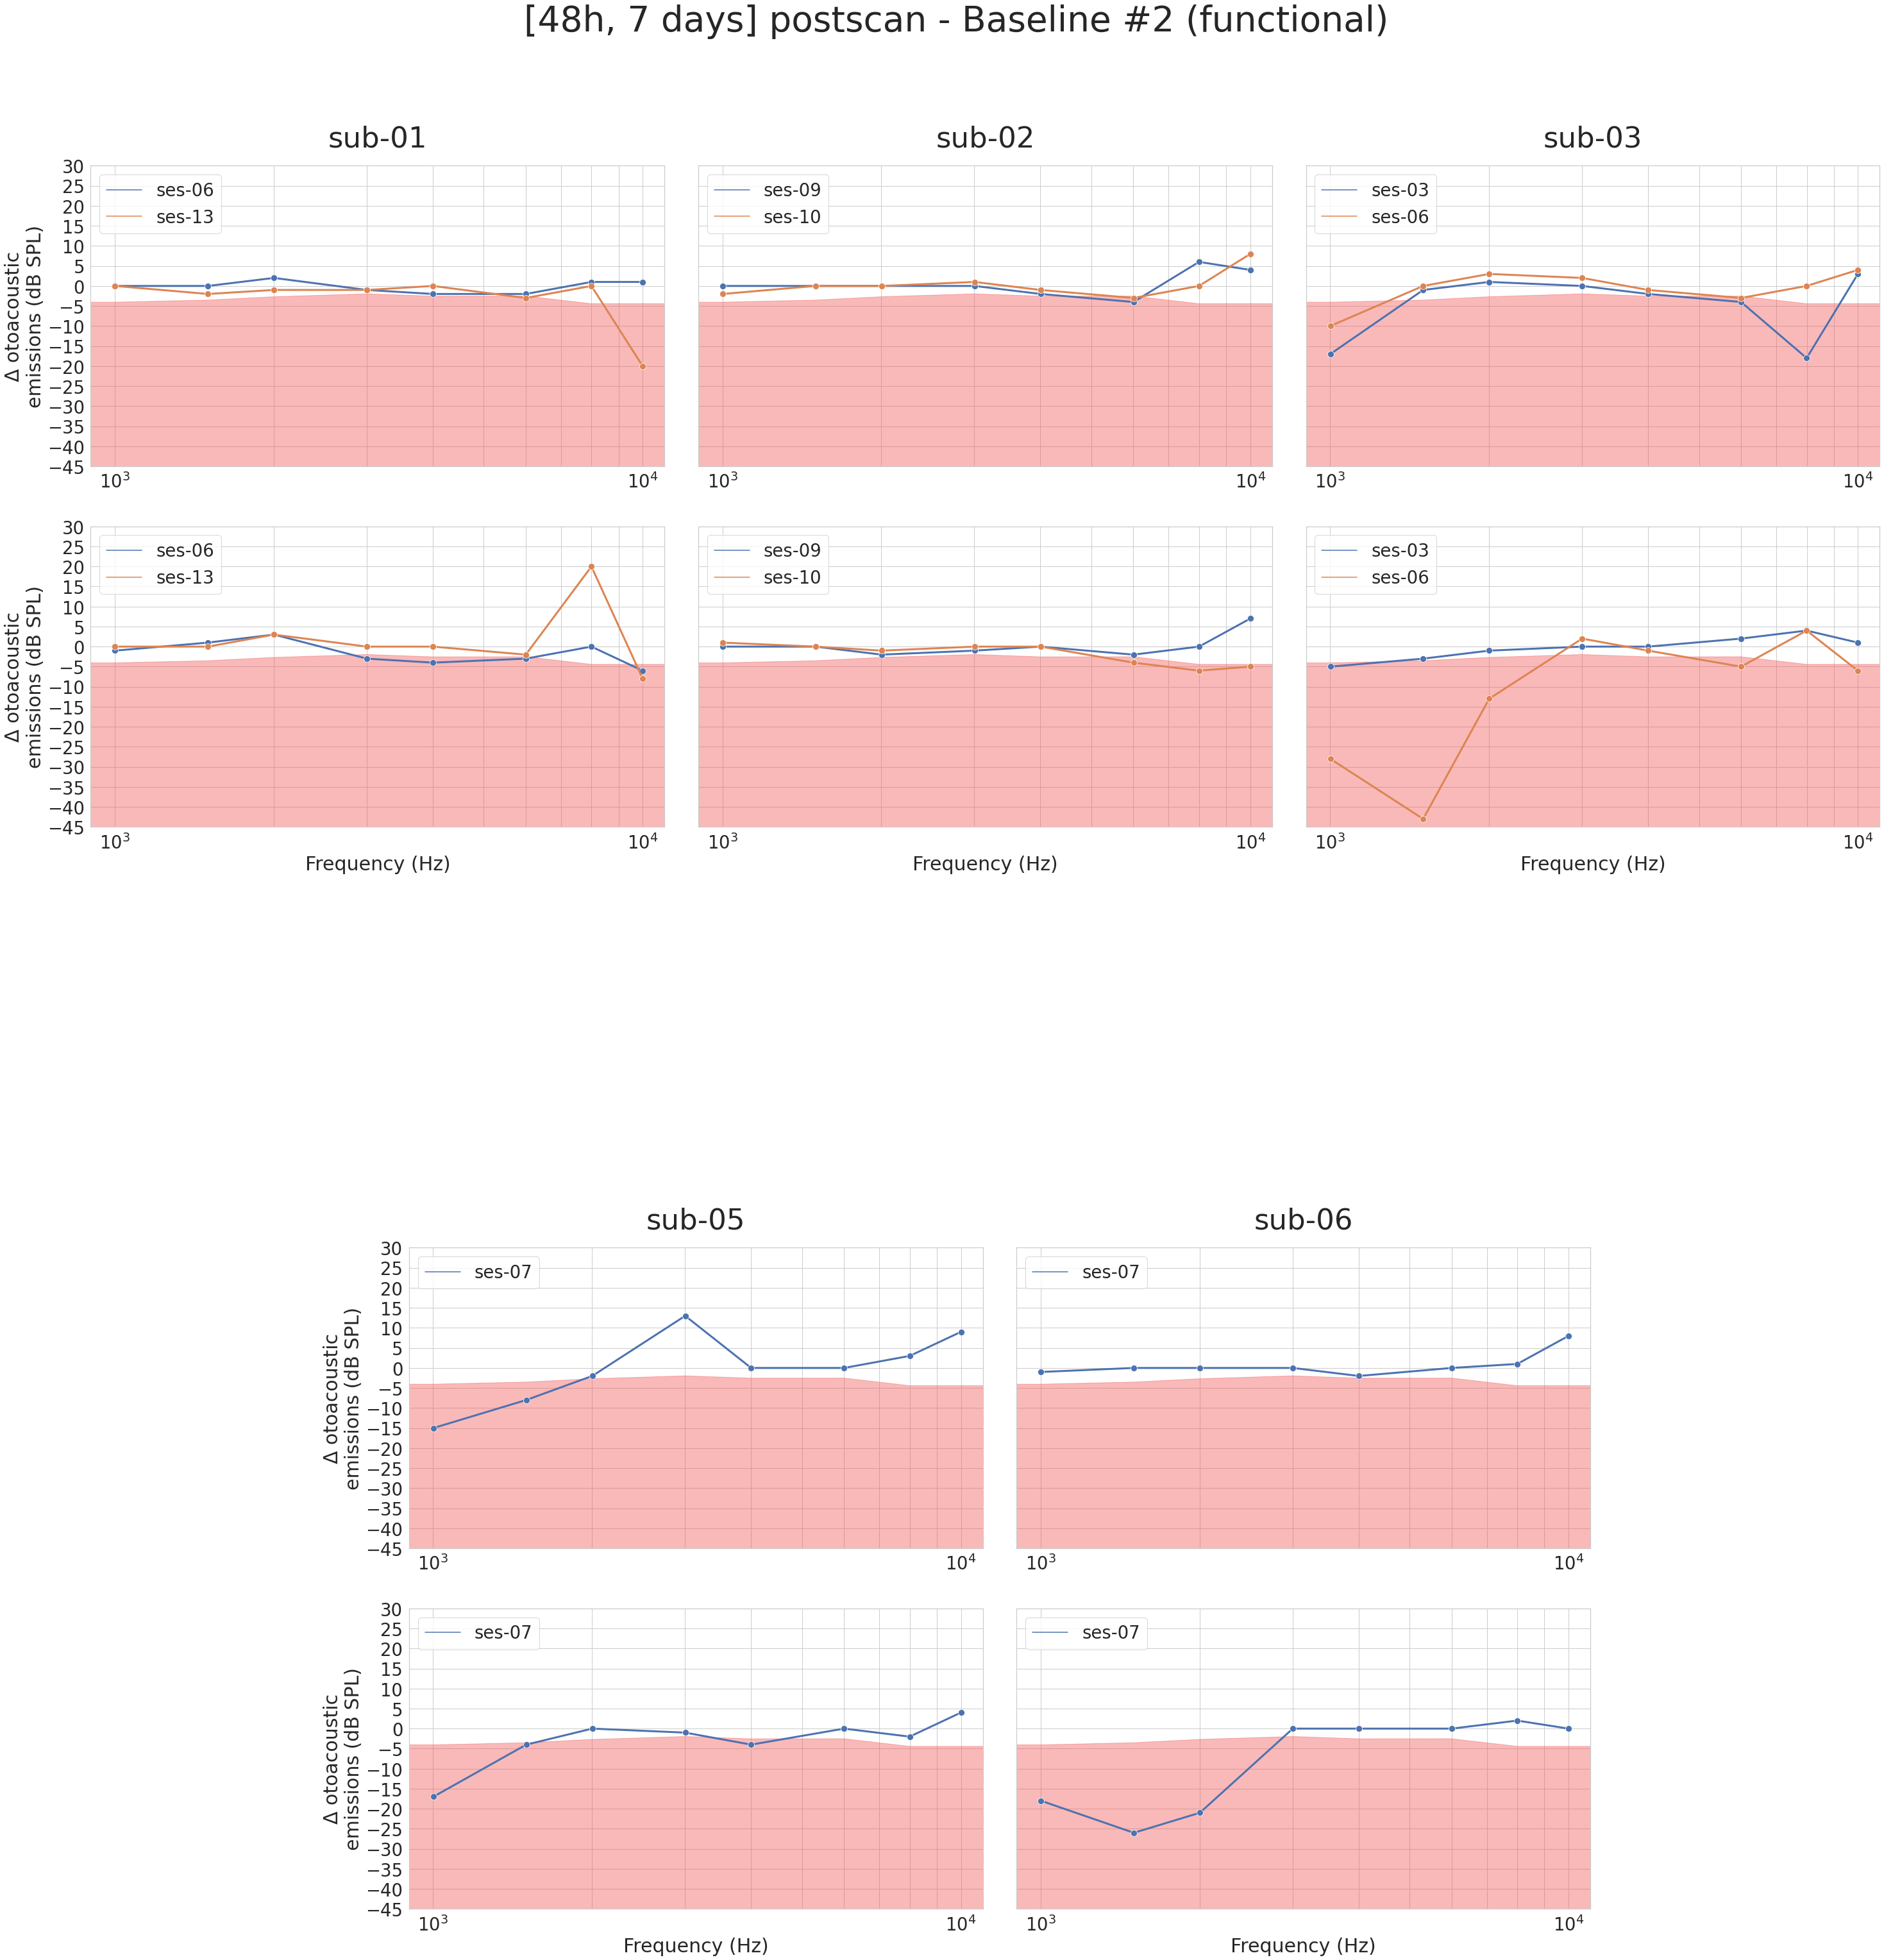

In [9]:
# Functional, [48h - 7 days] post scan - Baseline #2

plt.rcParams["figure.figsize"] = (50, 50) # v. 0.2.2
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 5
n_columns = 62

row_0_L = 0
row_0_R = 1
row_1_L = 3
row_1_R = 4

column_01 = 0
column_02 = 21
column_03 = 42
column_05 = 11
column_06 = 32

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_L, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_R, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_48.tick_params(labelbottom=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-01, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_func_48.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L)

fig_func_48.set(title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_func_48.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_func_48.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_func_48.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-05",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_48.tick_params(labelbottom=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_R)

fig_func_48.set(#title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_func_48.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_func_48.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

fig.suptitle("[48h, 7 days] postscan - Baseline #2 (functional)", fontsize=55, y=0.95)

#plt.tight_layout()

Text(0.5, 0.95, 'Postscan - Prescan (functional)')

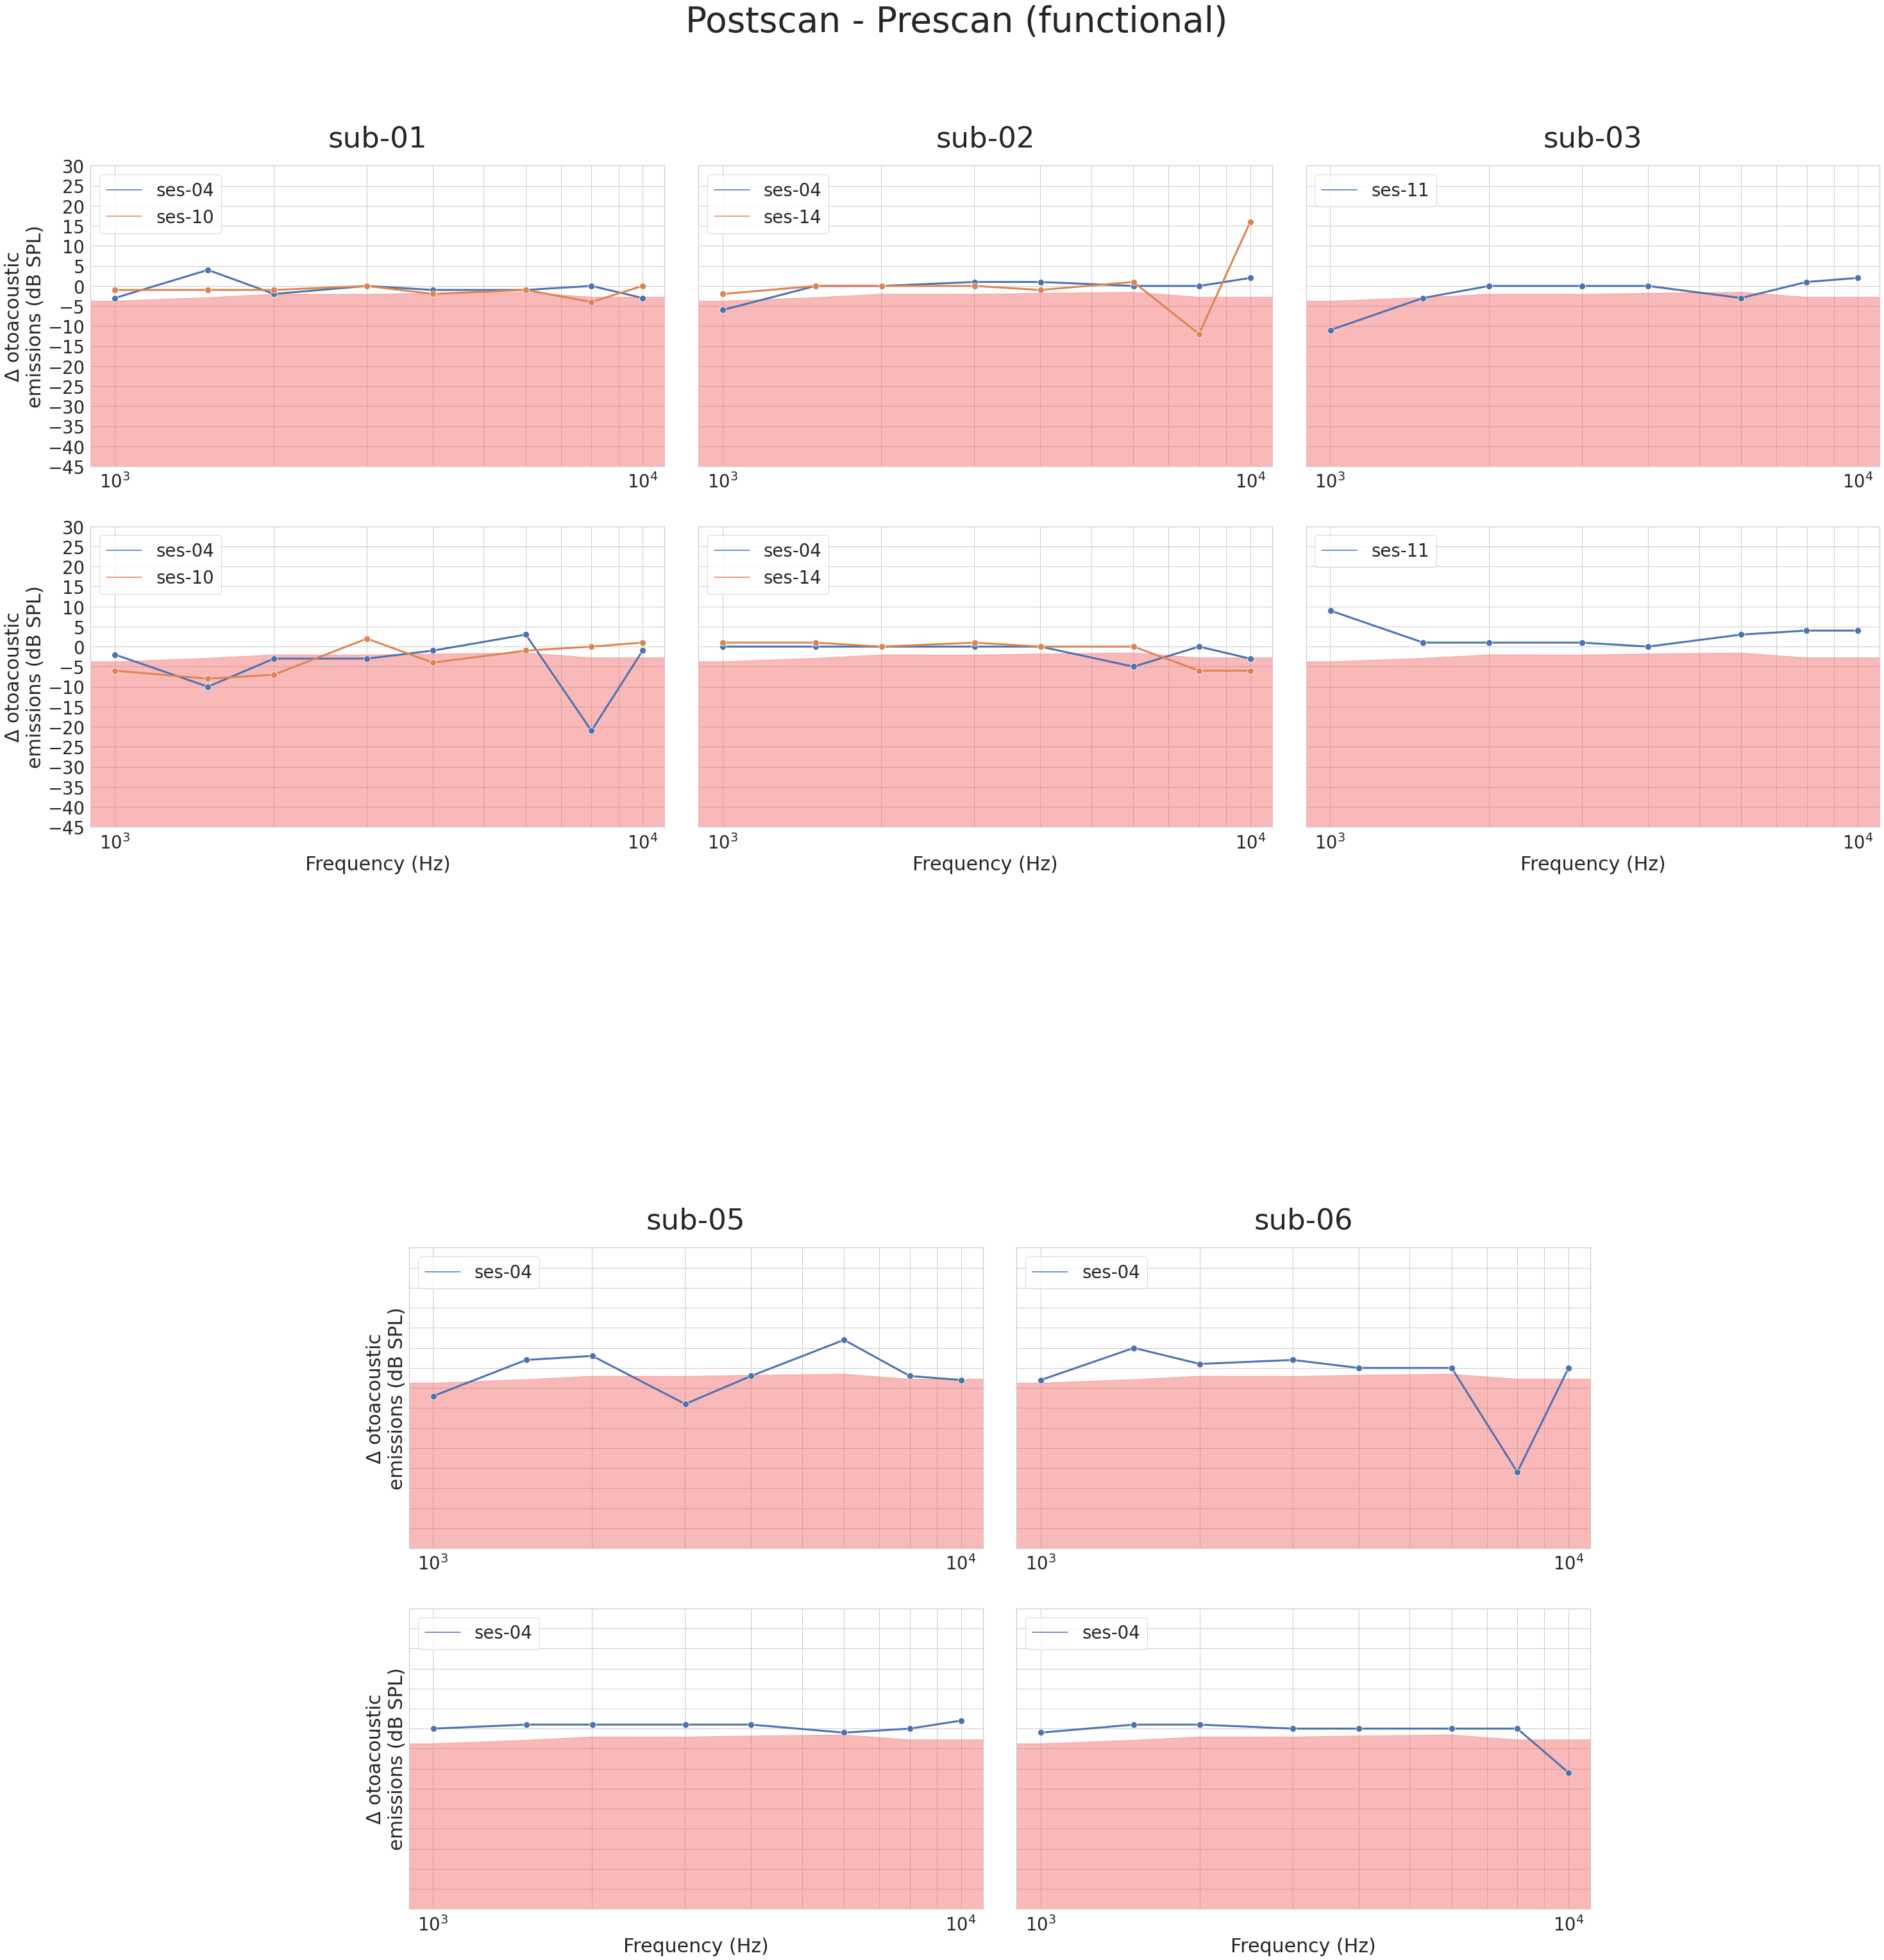

In [10]:
# Functional, Post scan - Pre scan

plt.rcParams["figure.figsize"] = (50, 50) # v. 0.2.2
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 5
n_columns = 62

row_0_L = 0
row_0_R = 1
row_1_L = 3
row_1_R = 4

column_01 = 0
column_02 = 21
column_03 = 42
column_05 = 11
column_06 = 32

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_0_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_L, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_R, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_1_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_func_pp.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_pp.tick_params(labelbottom=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-01, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_func_pp.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-02, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L)

fig_func_pp.set(title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-02, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_func_pp.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-03, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_func_pp.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-03, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_func_pp.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-05, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_L)

fig_func_pp.set(title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-05",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-05, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_R)

fig_func_pp.set(#title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-06, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_func_pp.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-06, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_func_pp.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

fig.suptitle("Postscan - Prescan (functional)", fontsize=55, y=0.95)

Text(0.5, 0.98, '[48h, 7 days] postscan - Baseline #1 (functional)')

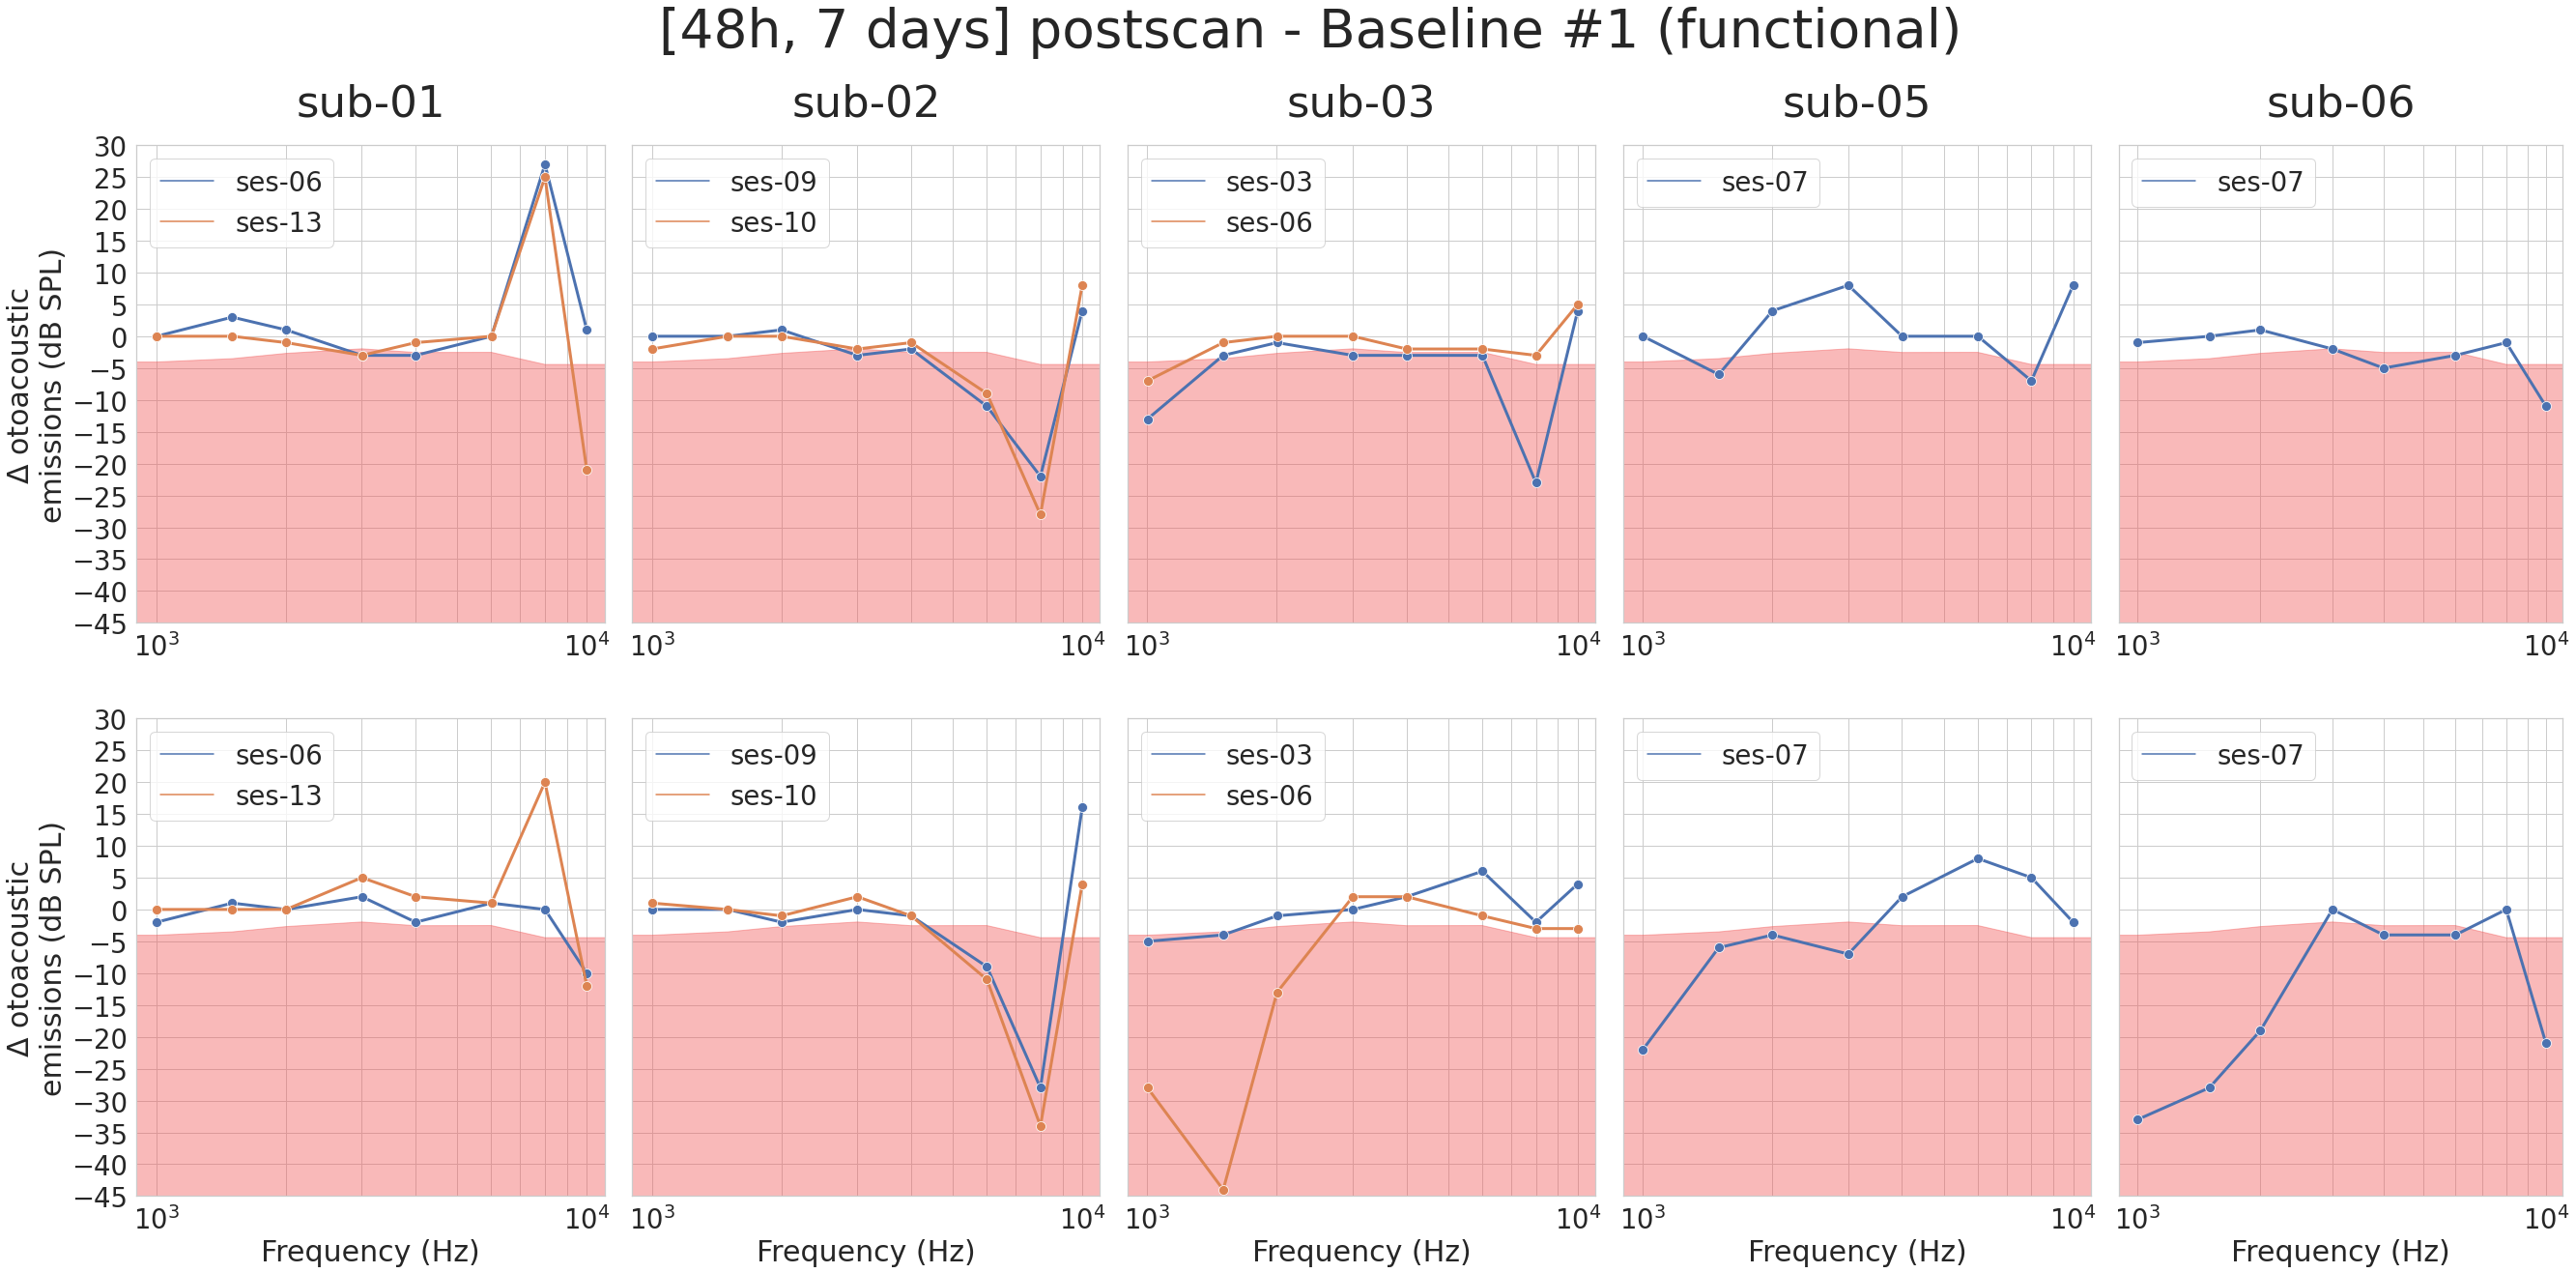

In [21]:
# Functional, [48h - 7 days] post scan - Baseline #1

#plt.rcParams["figure.figsize"] = (80, 20) # v. 0.2.3
plt.rcParams["figure.figsize"] = (45, 20) # v. 0.2.4
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 2
n_columns = 103

row_L = 0
row_R = 1

column_01 = 0
column_02 = 21
column_03 = 42
column_05 = 63
column_06 = 84

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_48.tick_params(labelbottom=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-01, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_func_48.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L)

fig_func_48.set(title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_func_48.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_func_48.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_func_48.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-05",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_R)

fig_func_48.set(#title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_1.loc[df_func_48_L_1["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_func_48.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_1.loc[df_func_48_R_1["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_func_48.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

fig.suptitle("[48h, 7 days] postscan - Baseline #1 (functional)", fontsize=55, y=0.98)

Text(0.5, 0.98, '[48h, 7 days] postscan - Baseline #2 (functional)')

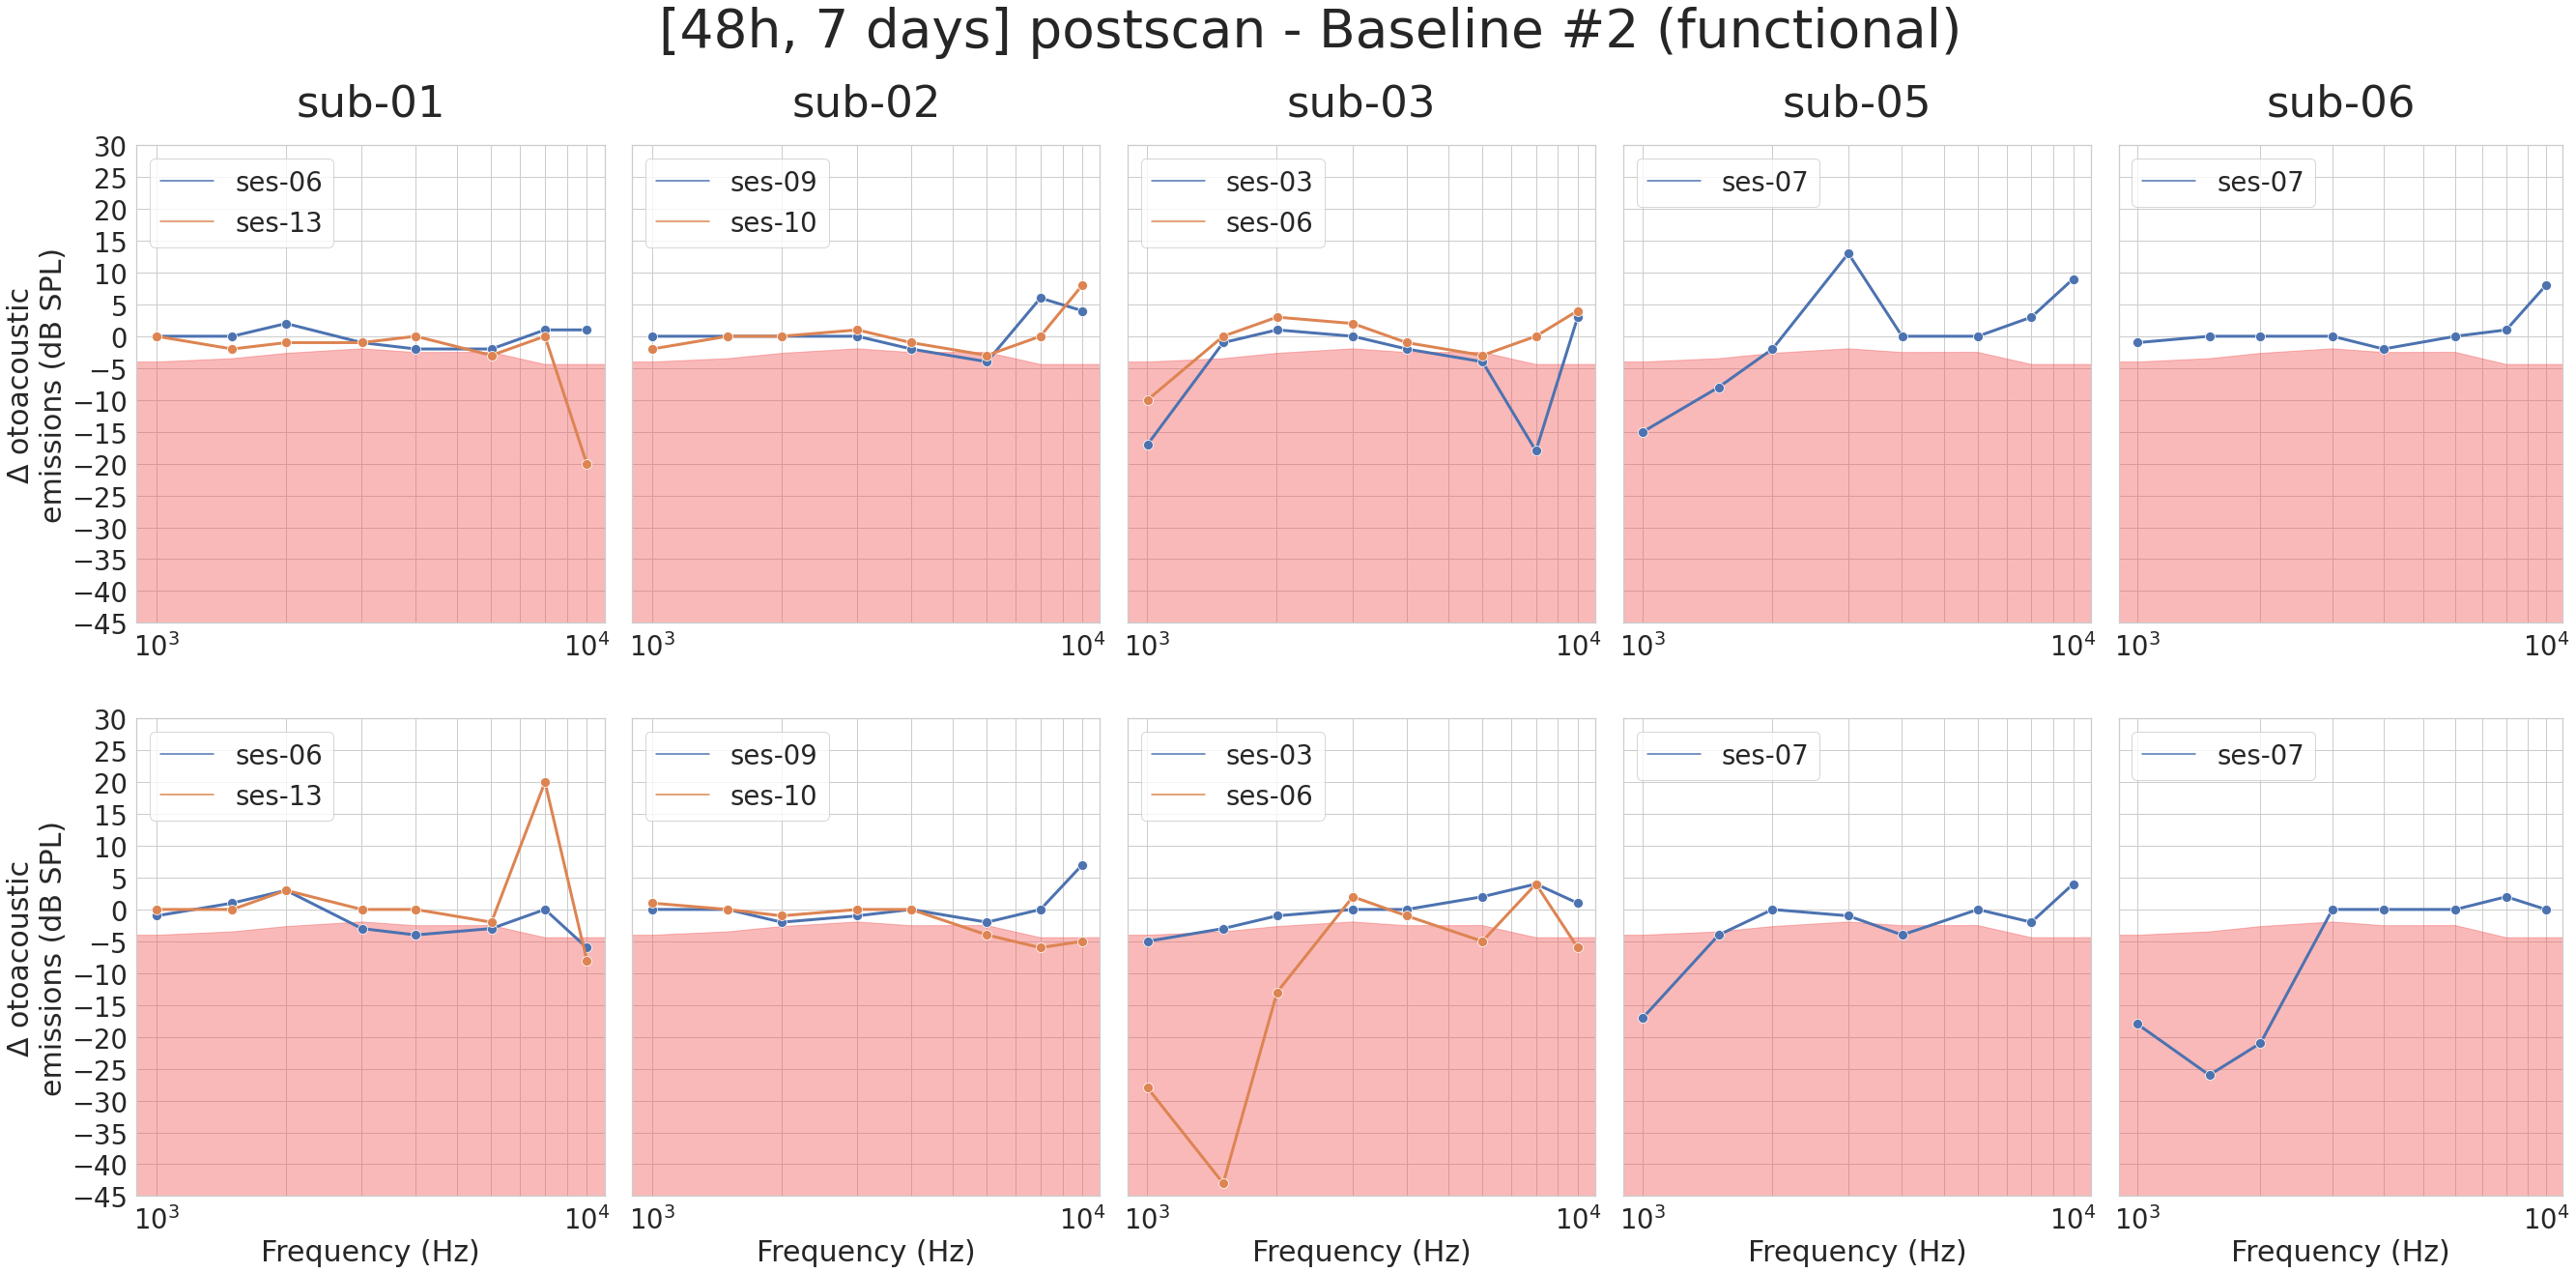

In [23]:
# Functional, [48h - 7 days] post scan - Baseline #2

#plt.rcParams["figure.figsize"] = (80, 20) # v. 0.2.3
plt.rcParams["figure.figsize"] = (45, 20) # v. 0.2.4
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 2
n_columns = 103

row_L = 0
row_R = 1

column_01 = 0
column_02 = 21
column_03 = 42
column_05 = 63
column_06 = 84

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_48.tick_params(labelbottom=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-01, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_func_48.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L)

fig_func_48.set(title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-02, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_func_48.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_func_48.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-03, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_func_48.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_L
                          )

fig_func_48.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-05",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-05, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_R)

fig_func_48.set(#title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Left
fig_func_48 = sns.lineplot(data=df_func_48_L_2.loc[df_func_48_L_2["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_func_48.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_48.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

# sub-06, Right
fig_func_48 = sns.lineplot(data=df_func_48_R_2.loc[df_func_48_R_2["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_func_48.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_48.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_48.tick_params(labelleft=False)
fig_func_48.legend_.set_title(None)
fig_func_48.legend(loc="upper left")

fig_func_48.fill_between(x=x_value_list, y1=-50, y2=y_value_list_48, color="#f25050", alpha=0.4)

fig.suptitle("[48h, 7 days] postscan - Baseline #2 (functional)", fontsize=55, y=0.98)

Text(0.5, 0.98, 'Postscan - Prescan (functional)')

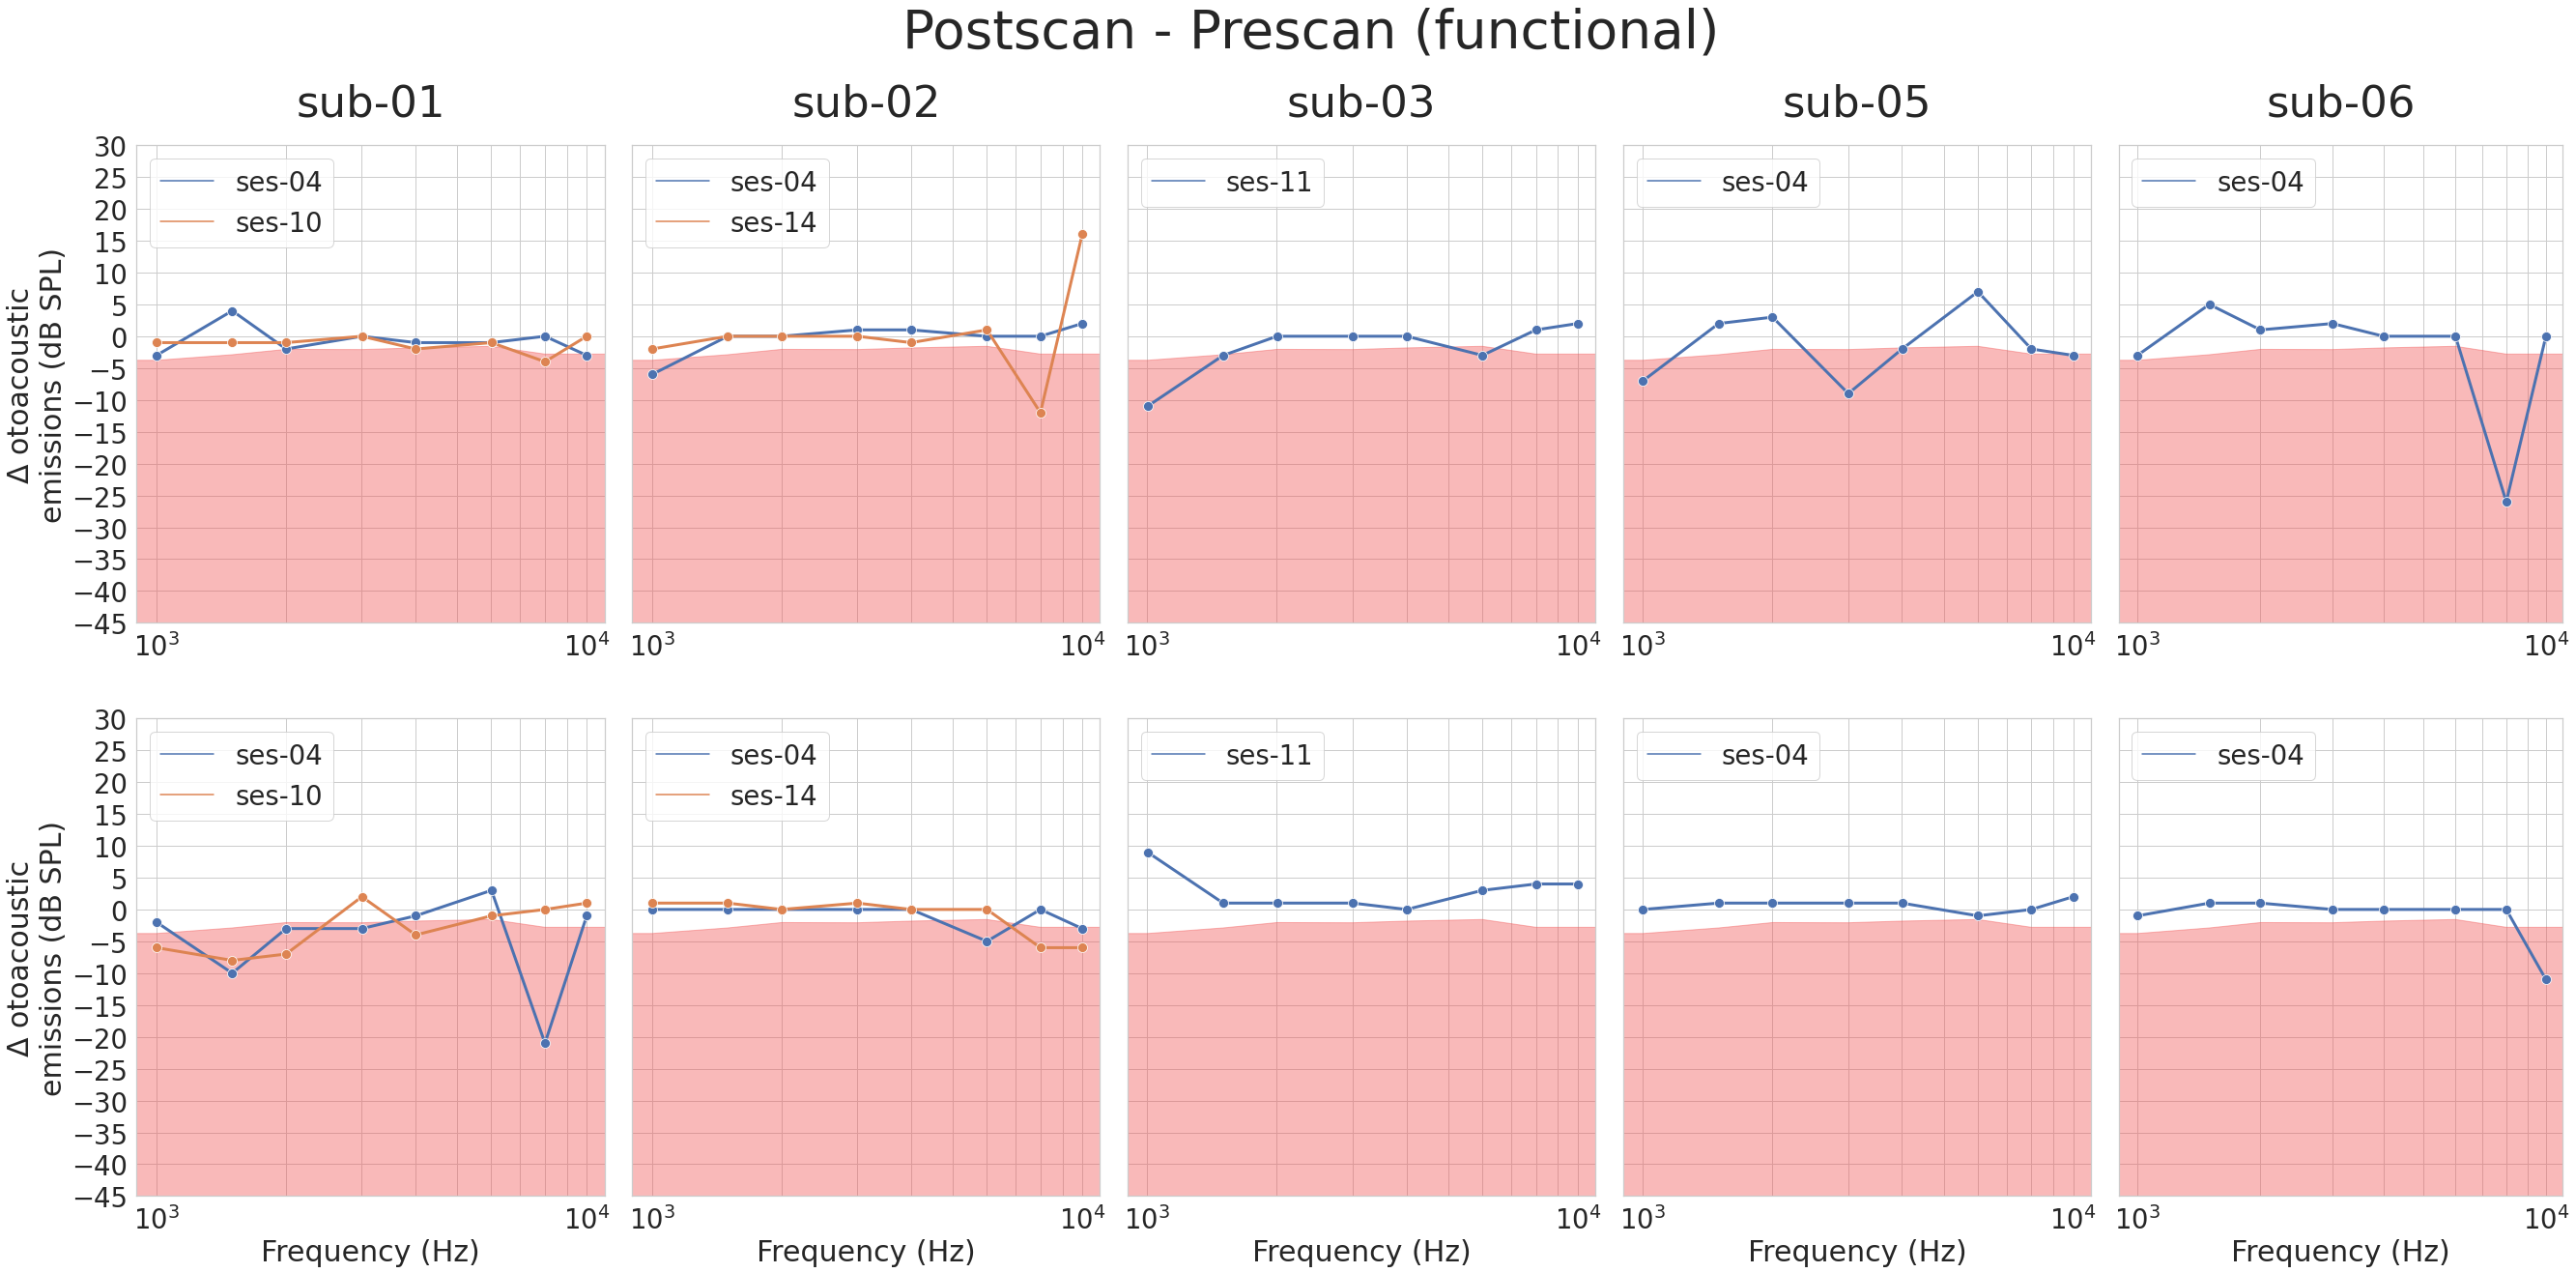

In [25]:
# Functional, Post scan - Pre scan

#plt.rcParams["figure.figsize"] = (80, 20) # v. 0.2.3
plt.rcParams["figure.figsize"] = (45, 20) # v. 0.2.4
sns.set(style="whitegrid",
        font_scale=2.5)

fig = plt.figure()

n_row = 2
n_columns = 103

row_L = 0
row_R = 1

column_01 = 0
column_02 = 21
column_03 = 42
column_05 = 63
column_06 = 84

rowspan = 1
colspan = 20

ax_01_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_01_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_01),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_02_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_02),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_03_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_03),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_05_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_05),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_L = plt.subplot2grid((n_row, n_columns),
                           loc=(row_L, column_06),
                           rowspan=rowspan,
                           colspan=colspan)
ax_06_R = plt.subplot2grid((n_row, n_columns),
                           loc=(row_R, column_06),
                           rowspan=rowspan,
                           colspan=colspan)

# sub-01, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_L
                          )

fig_func_pp.set(xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-01",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
#fig_func_pp.tick_params(labelbottom=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-01, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-01"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_01_R)

fig_func_pp.set(#title="sub-01",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.set_ylabel("\u0394 otoacoustic\nemissions (dB SPL)",
                       #fontsize=25,
                      )
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-02, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_L)

fig_func_pp.set(title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-02",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-02, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-02"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_02_R)

fig_func_pp.set(#title="sub-02",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-03, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_L)

fig_func_pp.set(title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-03",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-03, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-03"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_03_R)

fig_func_pp.set(#title="sub-03",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-05, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_L)

fig_func_pp.set(title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-05",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-05, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-05"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_05_R)

fig_func_pp.set(#title="sub-05",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-06, Left
fig_func_pp = sns.lineplot(data=df_func_pp_L.loc[df_func_pp_L["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_L)

fig_func_pp.set(title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel=None,
                #xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_title("sub-06",
                      fontsize=45,
                      #x=0.085,
                      y=1.05,
                     )
fig_func_pp.tick_params(#labelbottom=False,
                        labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

# sub-06, Right
fig_func_pp = sns.lineplot(data=df_func_pp_R.loc[df_func_pp_R["subject"] == "sub-06"],
                           x="x_list",
                           y="y_list",
                           hue="session_post",
                           linewidth=3,
                           marker="o",
                           markersize=10,
                           legend="brief",
                           ax=ax_06_R)

fig_func_pp.set(#title="sub-06",
                xscale="log",
                xlim=(900, 11000), xticks=x_ticks,
                xlabel="Frequency (Hz)",
                ylim=(-45, 30), yticks=y_ticks,
                ylabel=None,
                #ylabel="\u0394 otoacoustic\nemissions (dB SPL)"
               )

fig_func_pp.set_xlabel("Frequency (Hz)",
                       #fontsize=25,
                      )
fig_func_pp.tick_params(labelleft=False)
fig_func_pp.legend_.set_title(None)
fig_func_pp.legend(loc="upper left")

fig_func_pp.fill_between(x=x_value_list, y1=-50, y2=y_value_list_pp, color="#f25050", alpha=0.4)

fig.suptitle("Postscan - Prescan (functional)", fontsize=55, y=0.98)